<div style='font-size:200%;'>
    <a></a>
    <h1 style='color: green; font-weight: bold; font-family: Cascadia code;'>
        <center>Lung cancer prediction using Image-Segmentation, Equalization and Transfer learning</center>
    </h1>
</div>

- - -

<!-- <div style='font-size:200%;'>
    <a id='nan'></a>
    <h1 style='color: chartreuse; font-weight: bold; font-family: Cascadia code;'> Contents </h1>
</div> -->

<!-- - [Importing the necessary libraries ](#import)
- [Data Pre-processing](#preprocess)
- [Exploratory Data Analysis](#eda)
    - [NaN values heat-map](#heatmap)
    - [Typecasting and dropping columns](#typecast)
    - [Correlation between different features and our target variable](#corr)
    - [Distribution of Individuals based on HomePlanet](#planet)
- [Distribution of transported individuals](#trans)
- [Data Pre-processing](#preprocess)
    - [Imputing missing data](#impute)
    - [Typecasting and dropping columns](#typecast)
    - [One-Hot Encoding](#ohe)
    - [Splitting data into x (Values) and y (labels)](#split)
- [Classifying](#classify)
    - [Building and fitting the models](#build)
    - [Performance Analysis of the different models](#anal)
- [Submission](#submit) -->

- - -

## **Abstract:**

The second leading cause of death is cancer [9]. From this large domain of cancer, lung cancer is one of the main reasons for death in the world among both men and women, with an impressive rate of about five million deadly cases per year. Every year more than 2,00,000 cases are found in US [11]. Because of high quantity data in CT images and blurred boundaries, tumor segmentation and classification is very hard. In MR images, the amount of data is too much for manual interpretation and analysis. At a very early stage, cancer is not being found because of the small size of the nodules and location of the glands [11].
 Machine Learning makes the diagnosis process easier and deterministic. This work has introduced one automatic lung cancer detection method to increase the accuracy and yield and decrease the diagnosis time. The main objective of this work is to detect the cancerous lung nodules from a given input lung image and to predict the lung cancer using Deep Learning technique more efficiently than the existings.

- - -

<h1 ><a id='contents'><b>Contents<b></a></h1>

- [Importing necessary libraries](#import)
- [Proposed methodology](#methodology)
- [Data Pre-processing](#preprocess)
- [Comparison between processed and unprocessed image](#comparison)
- [Splitting the processed images](#split)
- [Neural nets](#nn)
    - [CNN](#cnn)
    - [VGG16](#vgg16)
    - [VGG19](#vgg19)
    - [MobileNet](#mobilenet)
    - [ResNet50](#resnet50)
    - [Xception](#xception)
    - [InceptionV3](#inceptionv3)
- [Example: Prediction vs Truth](#example)
- [Comparative analysis of the models](#analysis)
- [References](#references)

- - -

In [ ]:
pip install opencv-python

In [ ]:
pip install matplotlib

In [ ]:
pip install split-folders

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install seaborn

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Importing the necessary libraries</center>
    </h1>
</div>

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import numpy as np
import seaborn as sns

<div style='font-size:100%;'>
    <a id='methodology'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Proposed Methodology</center>
    </h1>
</div>

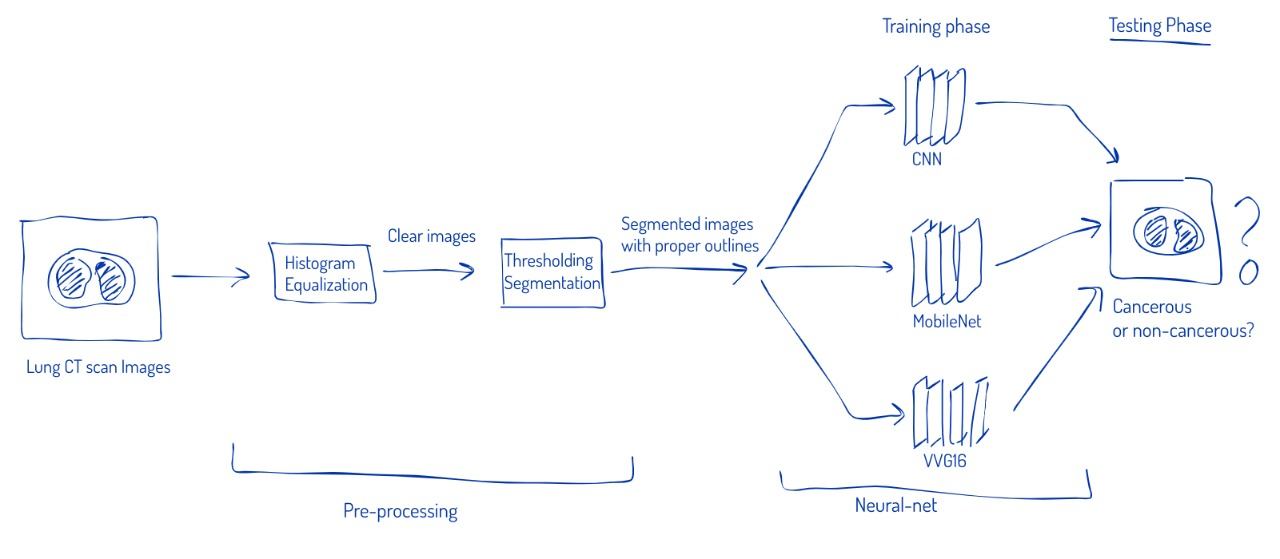

In [ ]:
Image(filename='/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/methodology.jpeg')

<div style='font-size:100%;'>
    <a id='preprocess'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Data Pre-processing</center>
    </h1>
</div>

## **Histogram Equalization**

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

## **Threshold Segmentation**

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### ***We will preprocess our raw data by histogram equalization and then segment it using thresholding***

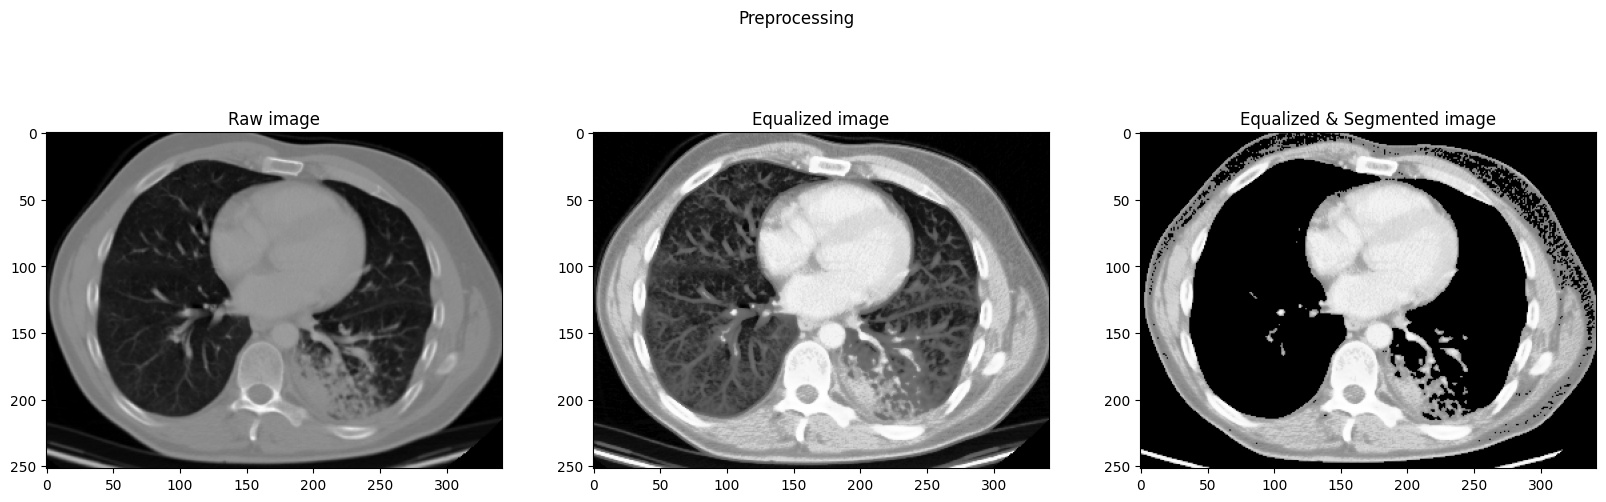

In [ ]:
img = cv2.imread('/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/rawData/squamous.cell.carcinoma/squamous.cell.carcinoma1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [ ]:
print(os.getcwd(), os.listdir())
DIR = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/data'

/content ['.config', 'drive', 'sample_data']


In [ ]:
!unzip /content/drive/MyDrive/rawData.zip -d /content

In [ ]:
if not os.path.exists(DEST_DIR):
    !mkdir data && cd data && mkdir cancerous && mkdir non-cancerous

for category in CATS:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        curr = os.path.join(path, image)
        img = cv2.imread(curr, 0)
        equalizedImage = cv2.equalizeHist(img)
        e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
        if category == 'normal':
            imgDest = curr.replace('rawData/normal', 'data/non-cancerous')
            cv2.imwrite(imgDest, segmentedImage)
        else:
            imgDest = curr.replace('rawData/adenocarcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/large.cell.carcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/squamous.cell.carcinoma', 'data/cancerous')
            cv2.imwrite(imgDest, segmentedImage)
print("Processed data directory created successfully at", DEST_DIR)

Processed data directory created successfully at /content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/data


In [ ]:
data = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/data'
num_images = sum(len(files) for _, _, files in os.walk(data))

print("Number of images in the dataset:", num_images)

Number of images in the dataset: 1000


<div style='font-size:100%;'>
    <a id='comparison'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Comparison between processed and unprocessed image</center>
    </h1>
</div>

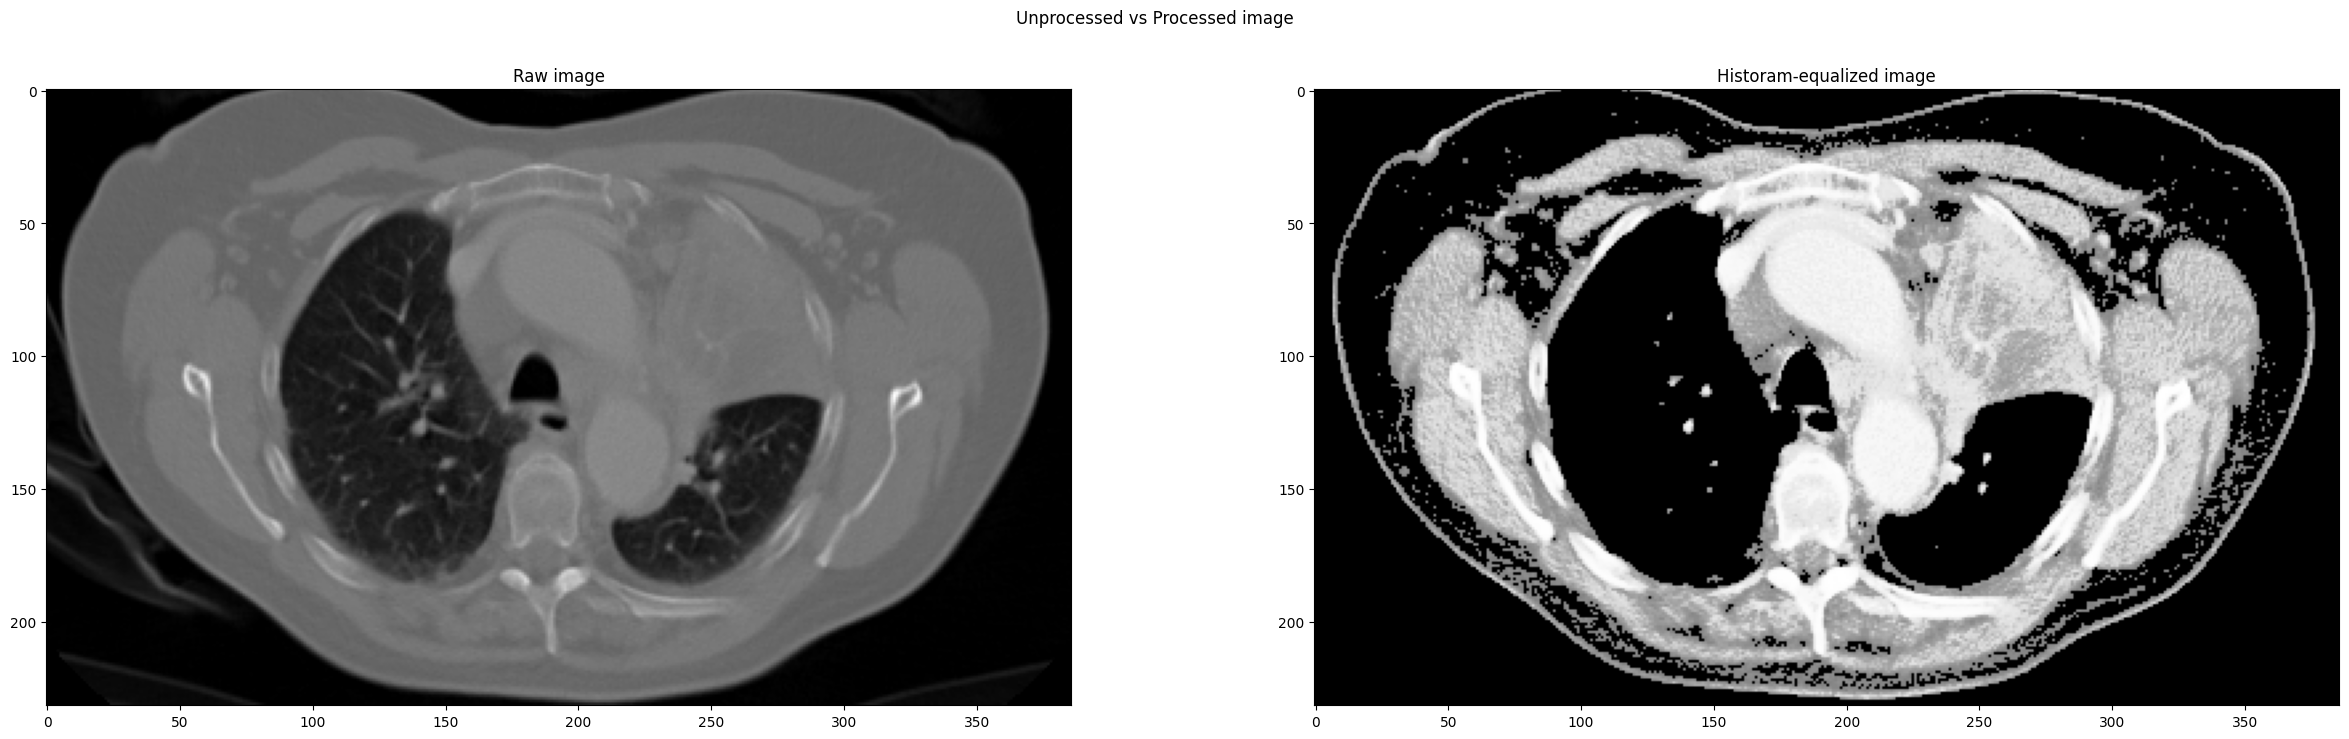

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

<div style='font-size:100%;'>
    <a id='split'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Splitting the processed images</center>
    </h1>
</div>

In [ ]:
FINAL_DIR = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/processedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2))

Copying files: 1000 files [06:33,  2.54 files/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/lung-cancer-detection-main/processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


<div style='font-size:100%;'>
    <a id='nn'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Neural nets</center>
    </h1>
</div>

In [ ]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

def plot_history(hist, name):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].plot(hist.history['Accuracy'])
  axs[0].plot(hist.history['val_Accuracy'])
  axs[0].set_title(f'{name} Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'val', 'F1', 'Recall'], loc='upper left')

  axs[1].plot(hist.history['loss'])
  axs[1].plot(hist.history['val_loss'])
  axs[1].set_title(f'{name} Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'val'], loc='upper left')

  axs[2].plot(hist.history['Precision'])
  axs[2].plot(hist.history['val_Precision'])
  axs[2].set_title(f'{name} Precision')
  axs[2].set_ylabel('Precision')
  axs[2].set_xlabel('Epoch')
  axs[2].legend(['train', 'val'], loc='upper left')

  plt.show()


<h1 align="center" ><a id='cnn'><b>CNN<b></a></h1>

In [ ]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

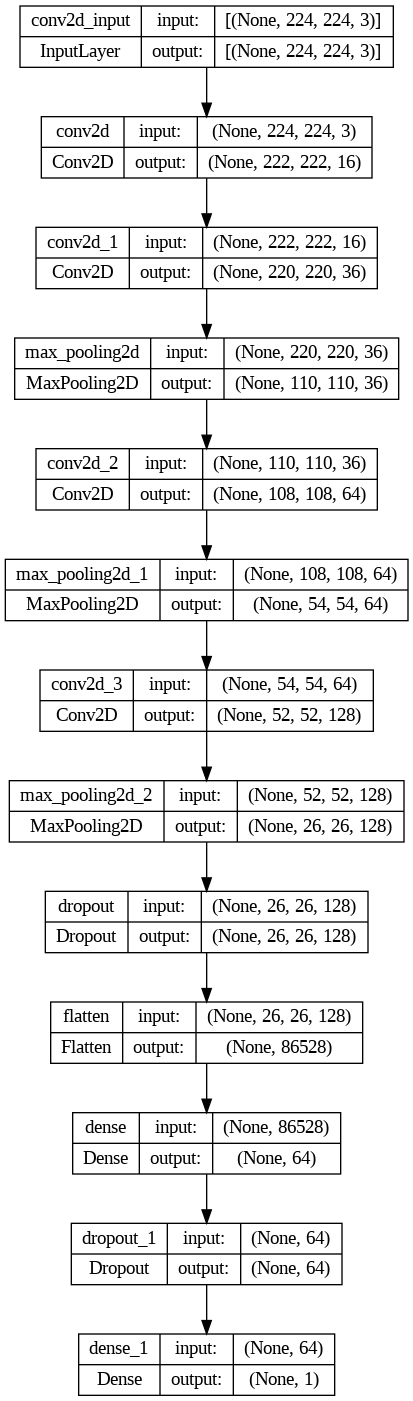

In [ ]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6311 - Accuracy: 0.7582 - Precision: 0.1200 - Recall: 0.0200 - AUC: 0.5318 - F1: 0.0088

22/22 [==============================] - 29s 694ms/step - loss: 0.6311 - Accuracy: 0.7582 - Precision: 0.1200 - Recall: 0.0200 - AUC: 0.5318 - F1: 0.0088 - val_loss: 0.5243 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.5440 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5037 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6320 - F1: 0.0000e+00

22/22 [==============================] - 14s 625ms/step - loss: 0.5037 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6320 - F1: 0.0000e+00 - val_loss: 0.4025 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8568 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4803 - Accuracy: 0.7911 - Precision: 1.0000 - Recall: 0.0267 - AUC: 0.7114 - F1: 0.0449

22/22 [==============================] - 15s 708ms/step - loss: 0.4803 - Accuracy: 0.7911 - Precision: 1.0000 - Recall: 0.0267 - AUC: 0.7114 - F1: 0.0449 - val_loss: 0.4493 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8578 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4962 - Accuracy: 0.7854 - Precision: 0.5000 - Recall: 0.0067 - AUC: 0.6711 - F1: 0.0076

22/22 [==============================] - 14s 609ms/step - loss: 0.4962 - Accuracy: 0.7854 - Precision: 0.5000 - Recall: 0.0067 - AUC: 0.6711 - F1: 0.0076 - val_loss: 0.3809 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8761 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4181 - Accuracy: 0.7926 - Precision: 0.7778 - Recall: 0.0467 - AUC: 0.8056 - F1: 0.0698

22/22 [==============================] - 14s 612ms/step - loss: 0.4181 - Accuracy: 0.7926 - Precision: 0.7778 - Recall: 0.0467 - AUC: 0.8056 - F1: 0.0698 - val_loss: 0.4338 - val_Accuracy: 0.9394 - val_Precision: 0.8571 - val_Recall: 0.8571 - val_AUC: 0.9582 - val_F1: 0.8794 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3807 - Accuracy: 0.8369 - Precision: 0.7812 - Recall: 0.3333 - AUC: 0.8499 - F1: 0.4464

22/22 [==============================] - 14s 615ms/step - loss: 0.3807 - Accuracy: 0.8369 - Precision: 0.7812 - Recall: 0.3333 - AUC: 0.8499 - F1: 0.4464 - val_loss: 0.2288 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9887 - val_F1: 0.9089 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3715 - Accuracy: 0.8283 - Precision: 0.6974 - Recall: 0.3533 - AUC: 0.8550 - F1: 0.4289

22/22 [==============================] - 13s 582ms/step - loss: 0.3715 - Accuracy: 0.8283 - Precision: 0.6974 - Recall: 0.3533 - AUC: 0.8550 - F1: 0.4289 - val_loss: 0.2126 - val_Accuracy: 0.9091 - val_Precision: 0.7727 - val_Recall: 0.8095 - val_AUC: 0.9826 - val_F1: 0.5941 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3333 - Accuracy: 0.8426 - Precision: 0.7128 - Recall: 0.4467 - AUC: 0.8906 - F1: 0.5279

22/22 [==============================] - 13s 557ms/step - loss: 0.3333 - Accuracy: 0.8426 - Precision: 0.7128 - Recall: 0.4467 - AUC: 0.8906 - F1: 0.5279 - val_loss: 0.2345 - val_Accuracy: 0.8788 - val_Precision: 0.9091 - val_Recall: 0.4762 - val_AUC: 0.9780 - val_F1: 0.4352 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.3400 - Accuracy: 0.8670 - Precision: 0.8132 - Recall: 0.4933 - AUC: 0.8808 - F1: 0.5889

22/22 [==============================] - 12s 543ms/step - loss: 0.3400 - Accuracy: 0.8670 - Precision: 0.8132 - Recall: 0.4933 - AUC: 0.8808 - F1: 0.5889 - val_loss: 0.1921 - val_Accuracy: 0.9495 - val_Precision: 0.8077 - val_Recall: 1.0000 - val_AUC: 0.9957 - val_F1: 0.6722 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3104 - Accuracy: 0.8612 - Precision: 0.7387 - Recall: 0.5467 - AUC: 0.9047 - F1: 0.6150

22/22 [==============================] - 13s 583ms/step - loss: 0.3104 - Accuracy: 0.8612 - Precision: 0.7387 - Recall: 0.5467 - AUC: 0.9047 - F1: 0.6150 - val_loss: 0.4869 - val_Accuracy: 0.6869 - val_Precision: 0.4038 - val_Recall: 1.0000 - val_AUC: 0.9750 - val_F1: 0.6690 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.3200 - Accuracy: 0.8655 - Precision: 0.7090 - Recall: 0.6333 - AUC: 0.8963 - F1: 0.6376

22/22 [==============================] - 13s 589ms/step - loss: 0.3200 - Accuracy: 0.8655 - Precision: 0.7090 - Recall: 0.6333 - AUC: 0.8963 - F1: 0.6376 - val_loss: 0.1709 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9930 - val_F1: 0.7083 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.3173 - Accuracy: 0.8684 - Precision: 0.7843 - Recall: 0.5333 - AUC: 0.8975 - F1: 0.6236

22/22 [==============================] - 13s 587ms/step - loss: 0.3173 - Accuracy: 0.8684 - Precision: 0.7843 - Recall: 0.5333 - AUC: 0.8975 - F1: 0.6236 - val_loss: 0.1710 - val_Accuracy: 0.9495 - val_Precision: 0.8077 - val_Recall: 1.0000 - val_AUC: 0.9915 - val_F1: 0.8735 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2713 - Accuracy: 0.8741 - Precision: 0.7279 - Recall: 0.6600 - AUC: 0.9289 - F1: 0.6680

22/22 [==============================] - 13s 603ms/step - loss: 0.2713 - Accuracy: 0.8741 - Precision: 0.7279 - Recall: 0.6600 - AUC: 0.9289 - F1: 0.6680 - val_loss: 0.1884 - val_Accuracy: 0.8990 - val_Precision: 0.6774 - val_Recall: 1.0000 - val_AUC: 0.9963 - val_F1: 0.8472 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.3345 - Accuracy: 0.8684 - Precision: 0.7132 - Recall: 0.6467 - AUC: 0.8918 - F1: 0.6582
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 12s 562ms/step - loss: 0.3345 - Accuracy: 0.8684 - Precision: 0.7132 - Recall: 0.6467 - AUC: 0.8918 - F1: 0.6582 - val_loss: 0.3798 - val_Accuracy: 0.7778 - val_Precision: 0.4884 - val_Recall: 1.0000 - val_AUC: 0.9857 - val_F1: 0.4895 - lr: 0.0010
Epoch 14: early stopping


In [ ]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 239ms/step - loss: 0.3101 - Accuracy: 0.8713 - Precision: 0.6286 - Recall: 1.0000 - AUC: 0.9845 - F1: 0.8042


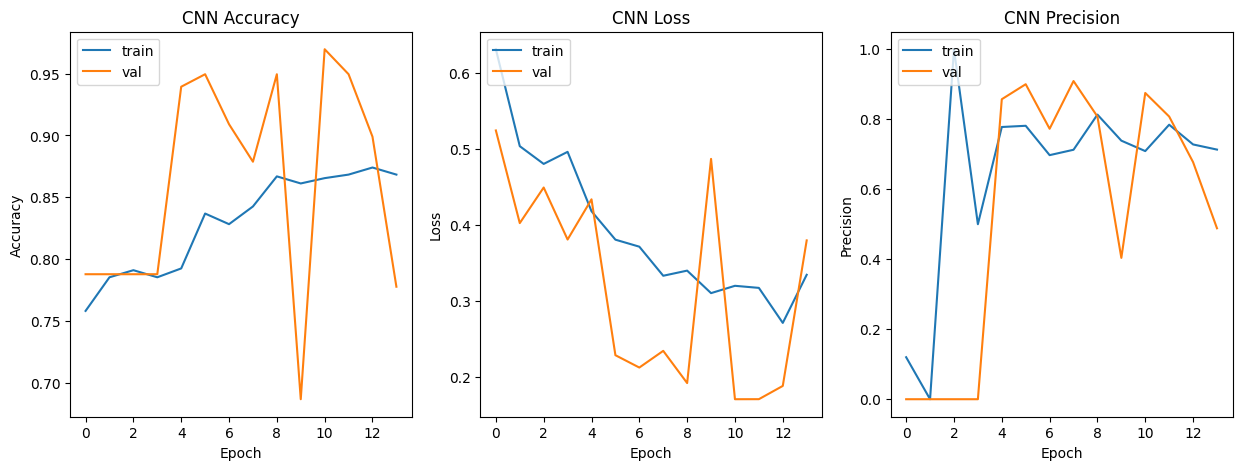

In [ ]:
plot_history(CNN_history, 'CNN')

<h1 align="center" ><a id='vgg16'><b>VGG16<b></a></h1>

In [ ]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                

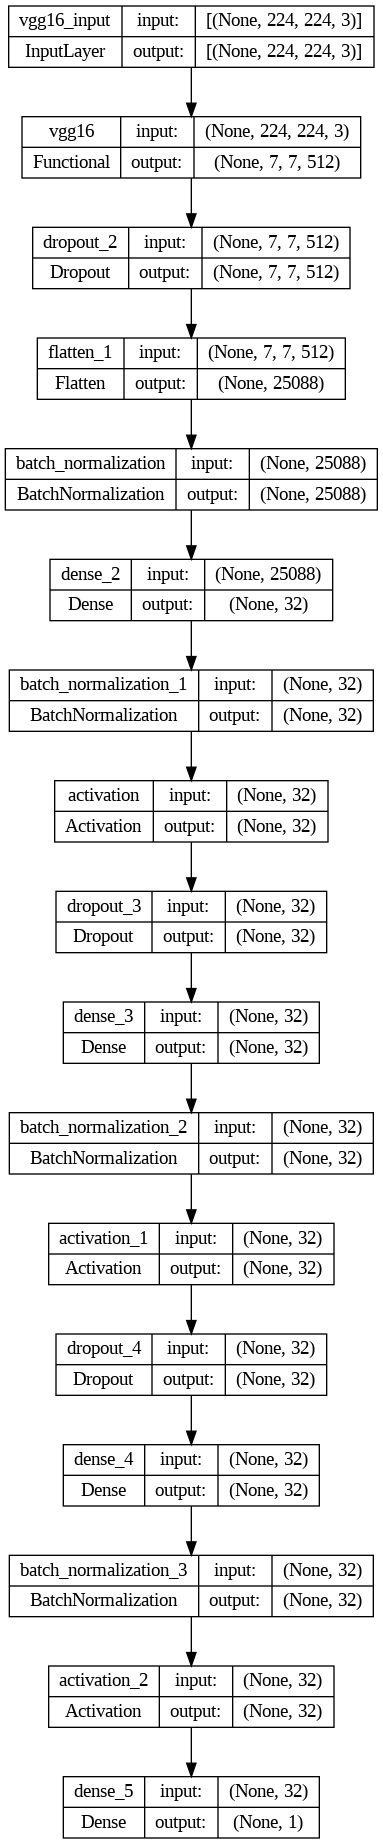

In [ ]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16_history = VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 36, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6440 - Accuracy: 0.7170 - Precision: 0.3883 - Recall: 0.5464 - AUC: 0.7401 - F1: 0.3438

22/22 [==============================] - 29s 849ms/step - loss: 0.6440 - Accuracy: 0.7170 - Precision: 0.3883 - Recall: 0.5464 - AUC: 0.7401 - F1: 0.3438 - val_loss: 0.5565 - val_Accuracy: 0.7879 - val_Precision: 0.5000 - val_Recall: 0.1905 - val_AUC: 0.5946 - val_F1: 0.2179 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5195 - Accuracy: 0.8083 - Precision: 0.5571 - Recall: 0.5200 - AUC: 0.7340 - F1: 0.5413

22/22 [==============================] - 14s 624ms/step - loss: 0.5195 - Accuracy: 0.8083 - Precision: 0.5571 - Recall: 0.5200 - AUC: 0.7340 - F1: 0.5413 - val_loss: 0.4674 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.8065 - val_F1: 0.2768 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4542 - Accuracy: 0.8326 - Precision: 0.6634 - Recall: 0.4467 - AUC: 0.8093 - F1: 0.5240

22/22 [==============================] - 13s 604ms/step - loss: 0.4542 - Accuracy: 0.8326 - Precision: 0.6634 - Recall: 0.4467 - AUC: 0.8093 - F1: 0.5240 - val_loss: 0.4310 - val_Accuracy: 0.8788 - val_Precision: 1.0000 - val_Recall: 0.4286 - val_AUC: 0.8874 - val_F1: 0.4583 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3896 - Accuracy: 0.8512 - Precision: 0.7170 - Recall: 0.5067 - AUC: 0.8803 - F1: 0.5959

22/22 [==============================] - 14s 618ms/step - loss: 0.3896 - Accuracy: 0.8512 - Precision: 0.7170 - Recall: 0.5067 - AUC: 0.8803 - F1: 0.5959 - val_loss: 0.3822 - val_Accuracy: 0.8687 - val_Precision: 1.0000 - val_Recall: 0.3810 - val_AUC: 0.9573 - val_F1: 0.4279 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3459 - Accuracy: 0.8684 - Precision: 0.8021 - Recall: 0.5133 - AUC: 0.9054 - F1: 0.6077

22/22 [==============================] - 14s 614ms/step - loss: 0.3459 - Accuracy: 0.8684 - Precision: 0.8021 - Recall: 0.5133 - AUC: 0.9054 - F1: 0.6077 - val_loss: 0.3417 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.9899 - val_F1: 0.2770 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3071 - Accuracy: 0.8941 - Precision: 0.8455 - Recall: 0.6200 - AUC: 0.9313 - F1: 0.7057

22/22 [==============================] - 13s 612ms/step - loss: 0.3071 - Accuracy: 0.8941 - Precision: 0.8455 - Recall: 0.6200 - AUC: 0.9313 - F1: 0.7057 - val_loss: 0.2678 - val_Accuracy: 0.8788 - val_Precision: 1.0000 - val_Recall: 0.4286 - val_AUC: 0.9866 - val_F1: 0.4602 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3073 - Accuracy: 0.8770 - Precision: 0.7909 - Recall: 0.5800 - AUC: 0.9141 - F1: 0.6540

22/22 [==============================] - 14s 615ms/step - loss: 0.3073 - Accuracy: 0.8770 - Precision: 0.7909 - Recall: 0.5800 - AUC: 0.9141 - F1: 0.6540 - val_loss: 0.1903 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9844 - val_F1: 0.6910 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2740 - Accuracy: 0.8927 - Precision: 0.8151 - Recall: 0.6467 - AUC: 0.9343 - F1: 0.7149

22/22 [==============================] - 14s 620ms/step - loss: 0.2740 - Accuracy: 0.8927 - Precision: 0.8151 - Recall: 0.6467 - AUC: 0.9343 - F1: 0.7149 - val_loss: 0.1588 - val_Accuracy: 0.9394 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9915 - val_F1: 0.6253 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2702 - Accuracy: 0.8913 - Precision: 0.8136 - Recall: 0.6400 - AUC: 0.9349 - F1: 0.7167

22/22 [==============================] - 14s 614ms/step - loss: 0.2702 - Accuracy: 0.8913 - Precision: 0.8136 - Recall: 0.6400 - AUC: 0.9349 - F1: 0.7167 - val_loss: 0.1251 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9915 - val_F1: 0.7308 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2428 - Accuracy: 0.9113 - Precision: 0.8438 - Recall: 0.7200 - AUC: 0.9421 - F1: 0.7735

22/22 [==============================] - 14s 612ms/step - loss: 0.2428 - Accuracy: 0.9113 - Precision: 0.8438 - Recall: 0.7200 - AUC: 0.9421 - F1: 0.7735 - val_loss: 0.1185 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.7333 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2412 - Accuracy: 0.8999 - Precision: 0.8333 - Recall: 0.6667 - AUC: 0.9516 - F1: 0.7343

22/22 [==============================] - 13s 604ms/step - loss: 0.2412 - Accuracy: 0.8999 - Precision: 0.8333 - Recall: 0.6667 - AUC: 0.9516 - F1: 0.7343 - val_loss: 0.1110 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.9722 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2013 - Accuracy: 0.9342 - Precision: 0.8881 - Recall: 0.7933 - AUC: 0.9651 - F1: 0.8243

22/22 [==============================] - 14s 628ms/step - loss: 0.2013 - Accuracy: 0.9342 - Precision: 0.8881 - Recall: 0.7933 - AUC: 0.9651 - F1: 0.8243 - val_loss: 0.1112 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9933 - val_F1: 0.6696 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1967 - Accuracy: 0.9328 - Precision: 0.8815 - Recall: 0.7933 - AUC: 0.9627 - F1: 0.8296

22/22 [==============================] - 13s 610ms/step - loss: 0.1967 - Accuracy: 0.9328 - Precision: 0.8815 - Recall: 0.7933 - AUC: 0.9627 - F1: 0.8296 - val_loss: 0.1198 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9896 - val_F1: 0.6723 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1954 - Accuracy: 0.9199 - Precision: 0.8507 - Recall: 0.7600 - AUC: 0.9672 - F1: 0.7945

22/22 [==============================] - 14s 614ms/step - loss: 0.1954 - Accuracy: 0.9199 - Precision: 0.8507 - Recall: 0.7600 - AUC: 0.9672 - F1: 0.7945 - val_loss: 0.0938 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9857 - val_F1: 0.9808 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1752 - Accuracy: 0.9256 - Precision: 0.8952 - Recall: 0.7400 - AUC: 0.9712 - F1: 0.8150

22/22 [==============================] - 13s 608ms/step - loss: 0.1752 - Accuracy: 0.9256 - Precision: 0.8952 - Recall: 0.7400 - AUC: 0.9712 - F1: 0.8150 - val_loss: 0.0908 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.7143 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1814 - Accuracy: 0.9356 - Precision: 0.8723 - Recall: 0.8200 - AUC: 0.9704 - F1: 0.8430

22/22 [==============================] - 14s 615ms/step - loss: 0.1814 - Accuracy: 0.9356 - Precision: 0.8723 - Recall: 0.8200 - AUC: 0.9704 - F1: 0.8430 - val_loss: 0.0892 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9924 - val_F1: 0.7308 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1791 - Accuracy: 0.9256 - Precision: 0.8712 - Recall: 0.7667 - AUC: 0.9734 - F1: 0.8007

22/22 [==============================] - 13s 604ms/step - loss: 0.1791 - Accuracy: 0.9256 - Precision: 0.8712 - Recall: 0.7667 - AUC: 0.9734 - F1: 0.8007 - val_loss: 0.0811 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9933 - val_F1: 0.7353 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.2117 - Accuracy: 0.9242 - Precision: 0.8489 - Recall: 0.7867 - AUC: 0.9671 - F1: 0.8002

22/22 [==============================] - 13s 611ms/step - loss: 0.2117 - Accuracy: 0.9242 - Precision: 0.8489 - Recall: 0.7867 - AUC: 0.9671 - F1: 0.8002 - val_loss: 0.0679 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9930 - val_F1: 0.9500 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.1597 - Accuracy: 0.9442 - Precision: 0.8993 - Recall: 0.8333 - AUC: 0.9770 - F1: 0.8678

22/22 [==============================] - 13s 605ms/step - loss: 0.1597 - Accuracy: 0.9442 - Precision: 0.8993 - Recall: 0.8333 - AUC: 0.9770 - F1: 0.8678 - val_loss: 0.0685 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.7222 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1746 - Accuracy: 0.9242 - Precision: 0.8702 - Recall: 0.7600 - AUC: 0.9749 - F1: 0.8157

22/22 [==============================] - 14s 617ms/step - loss: 0.1746 - Accuracy: 0.9242 - Precision: 0.8702 - Recall: 0.7600 - AUC: 0.9749 - F1: 0.8157 - val_loss: 0.0674 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9881 - val_F1: 0.7308 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.1785 - Accuracy: 0.9313 - Precision: 0.8750 - Recall: 0.7933 - AUC: 0.9713 - F1: 0.8305

22/22 [==============================] - 13s 609ms/step - loss: 0.1785 - Accuracy: 0.9313 - Precision: 0.8750 - Recall: 0.7933 - AUC: 0.9713 - F1: 0.8305 - val_loss: 0.0631 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.7333 - lr: 0.0010
Epoch 22/36
22/22 [==============================] - ETA: 0s - loss: 0.1644 - Accuracy: 0.9385 - Precision: 0.8690 - Recall: 0.8400 - AUC: 0.9802 - F1: 0.8450

22/22 [==============================] - 14s 619ms/step - loss: 0.1644 - Accuracy: 0.9385 - Precision: 0.8690 - Recall: 0.8400 - AUC: 0.9802 - F1: 0.8450 - val_loss: 0.0624 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9866 - val_F1: 0.9833 - lr: 0.0010
Epoch 23/36
22/22 [==============================] - ETA: 0s - loss: 0.1948 - Accuracy: 0.9142 - Precision: 0.8125 - Recall: 0.7800 - AUC: 0.9726 - F1: 0.7874

22/22 [==============================] - 14s 608ms/step - loss: 0.1948 - Accuracy: 0.9142 - Precision: 0.8125 - Recall: 0.7800 - AUC: 0.9726 - F1: 0.7874 - val_loss: 0.0596 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9875 - val_F1: 0.9833 - lr: 0.0010
Epoch 24/36
22/22 [==============================] - ETA: 0s - loss: 0.1418 - Accuracy: 0.9356 - Precision: 0.8671 - Recall: 0.8267 - AUC: 0.9849 - F1: 0.8339

22/22 [==============================] - 14s 634ms/step - loss: 0.1418 - Accuracy: 0.9356 - Precision: 0.8671 - Recall: 0.8267 - AUC: 0.9849 - F1: 0.8339 - val_loss: 0.0600 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9921 - val_F1: 0.7333 - lr: 0.0010
Epoch 25/36
22/22 [==============================] - ETA: 0s - loss: 0.1499 - Accuracy: 0.9399 - Precision: 0.8971 - Recall: 0.8133 - AUC: 0.9807 - F1: 0.8556

22/22 [==============================] - 13s 601ms/step - loss: 0.1499 - Accuracy: 0.9399 - Precision: 0.8971 - Recall: 0.8133 - AUC: 0.9807 - F1: 0.8556 - val_loss: 0.0596 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9811 - val_F1: 0.9833 - lr: 0.0010
Epoch 26/36
22/22 [==============================] - ETA: 0s - loss: 0.1644 - Accuracy: 0.9313 - Precision: 0.8446 - Recall: 0.8333 - AUC: 0.9748 - F1: 0.8289

22/22 [==============================] - 13s 604ms/step - loss: 0.1644 - Accuracy: 0.9313 - Precision: 0.8446 - Recall: 0.8333 - AUC: 0.9748 - F1: 0.8289 - val_loss: 0.0595 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9860 - val_F1: 0.7273 - lr: 0.0010
Epoch 27/36
22/22 [==============================] - ETA: 0s - loss: 0.1465 - Accuracy: 0.9485 - Precision: 0.8958 - Recall: 0.8600 - AUC: 0.9811 - F1: 0.8741

22/22 [==============================] - 13s 607ms/step - loss: 0.1465 - Accuracy: 0.9485 - Precision: 0.8958 - Recall: 0.8600 - AUC: 0.9811 - F1: 0.8741 - val_loss: 0.0597 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.7381 - lr: 0.0010
Epoch 28/36
22/22 [==============================] - ETA: 0s - loss: 0.1557 - Accuracy: 0.9385 - Precision: 0.9084 - Recall: 0.7933 - AUC: 0.9764 - F1: 0.8386

22/22 [==============================] - 13s 614ms/step - loss: 0.1557 - Accuracy: 0.9385 - Precision: 0.9084 - Recall: 0.7933 - AUC: 0.9764 - F1: 0.8386 - val_loss: 0.0572 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9957 - val_F1: 0.9833 - lr: 0.0010
Epoch 29/36
22/22 [==============================] - ETA: 0s - loss: 0.1501 - Accuracy: 0.9428 - Precision: 0.8819 - Recall: 0.8467 - AUC: 0.9798 - F1: 0.8609

22/22 [==============================] - 13s 594ms/step - loss: 0.1501 - Accuracy: 0.9428 - Precision: 0.8819 - Recall: 0.8467 - AUC: 0.9798 - F1: 0.8609 - val_loss: 0.0565 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9948 - val_F1: 0.9643 - lr: 0.0010
Epoch 30/36
22/22 [==============================] - ETA: 0s - loss: 0.1273 - Accuracy: 0.9442 - Precision: 0.8725 - Recall: 0.8667 - AUC: 0.9865 - F1: 0.8566

22/22 [==============================] - 13s 610ms/step - loss: 0.1273 - Accuracy: 0.9442 - Precision: 0.8725 - Recall: 0.8667 - AUC: 0.9865 - F1: 0.8566 - val_loss: 0.0573 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9911 - val_F1: 0.9808 - lr: 0.0010
Epoch 31/36
22/22 [==============================] - ETA: 0s - loss: 0.1222 - Accuracy: 0.9542 - Precision: 0.8986 - Recall: 0.8867 - AUC: 0.9869 - F1: 0.8839

22/22 [==============================] - 13s 602ms/step - loss: 0.1222 - Accuracy: 0.9542 - Precision: 0.8986 - Recall: 0.8867 - AUC: 0.9869 - F1: 0.8839 - val_loss: 0.0613 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.9641 - lr: 0.0010
Epoch 32/36
22/22 [==============================] - ETA: 0s - loss: 0.1424 - Accuracy: 0.9571 - Precision: 0.8947 - Recall: 0.9067 - AUC: 0.9828 - F1: 0.8838
Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 14s 614ms/step - loss: 0.1424 - Accuracy: 0.9571 - Precision: 0.8947 - Recall: 0.9067 - AUC: 0.9828 - F1: 0.8838 - val_loss: 0.0654 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9951 - val_F1: 0.7080 - lr: 0.0010
Epoch 32: early stopping


In [ ]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 4s 646ms/step - loss: 0.0471 - Accuracy: 0.9802 - Precision: 0.9167 - Recall: 1.0000 - AUC: 0.9997 - F1: 0.9333


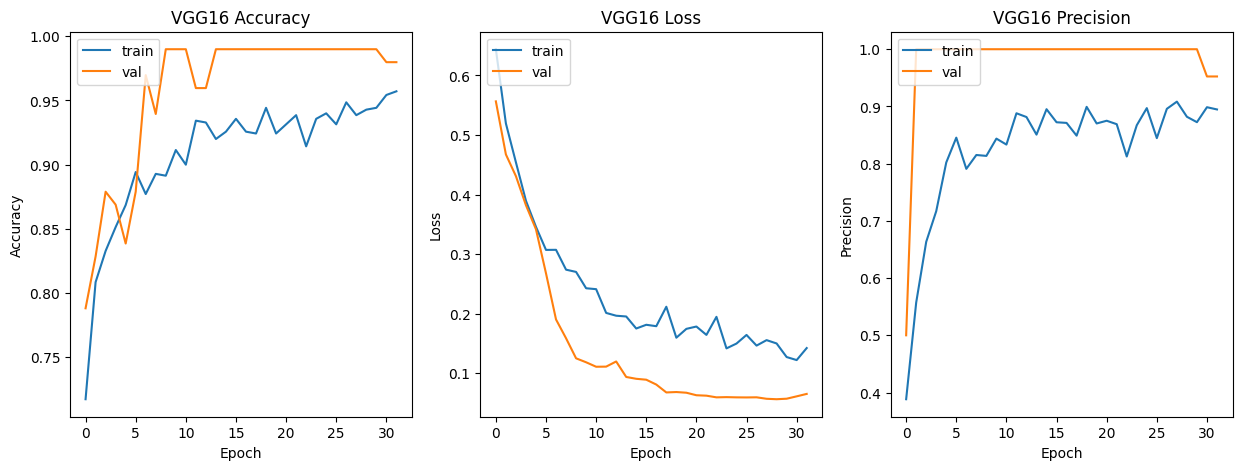

In [ ]:
plot_history(VGG16_history, 'VGG16')

<h1 align="center" ><a id='mobilenet'><b>MobileNet<b></a></h1>

In [ ]:
MOBILENET_base =  tf.keras.applications.MobileNet(input_shape=(224,224,3), include_top= False)

for layer in MOBILENET_base.layers:
    layer.trainable = False

MOBILENET=tf.keras.Sequential()
MOBILENET.add(MOBILENET_base)
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Flatten())
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MOBILENET.summary()

MOBILENET.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 batch_normalization_4 (Bat  (None, 50176)             200704    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                1605664   
                                                       

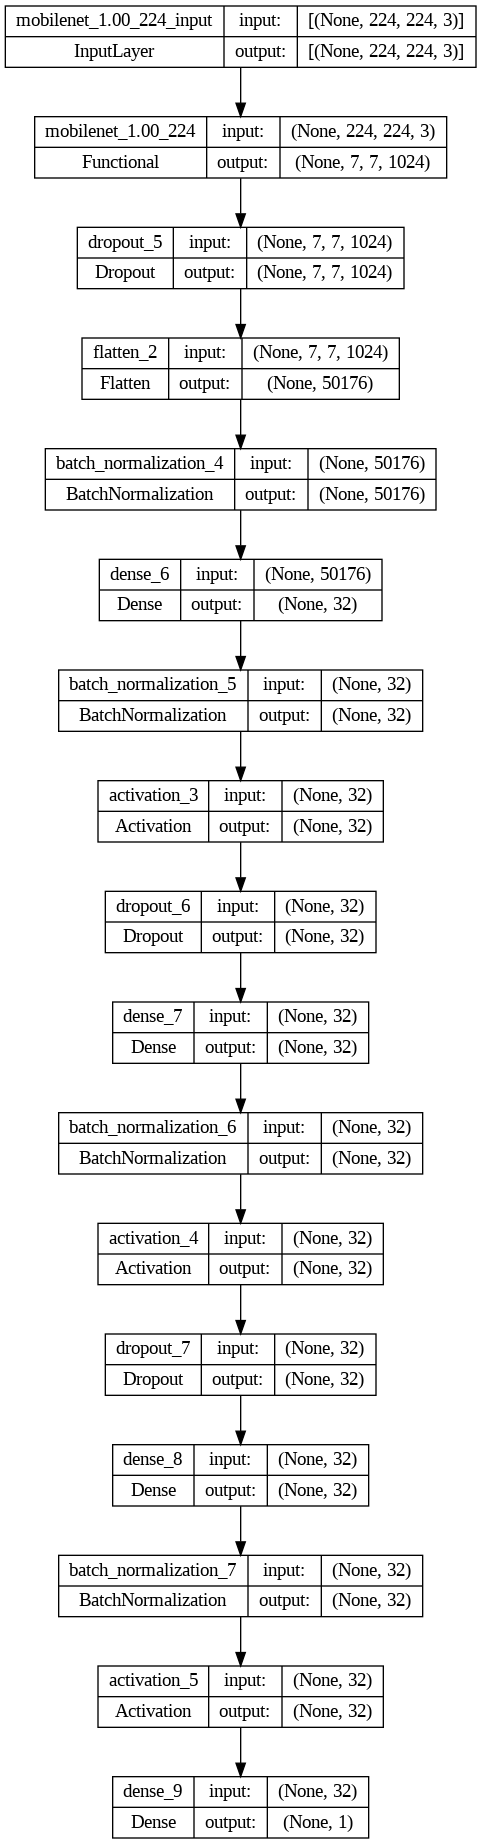

In [ ]:
tf.keras.utils.plot_model(MOBILENET, to_file='MOBILENET.png', show_shapes=True,show_layer_names=True)
Image(filename='MOBILENET.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('MOBILENET.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

MOBILENET_history = MOBILENET.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6178 - Accuracy: 0.7314 - Precision: 0.4205 - Recall: 0.6546 - AUC: 0.7991 - F1: 0.4139

22/22 [==============================] - 18s 621ms/step - loss: 0.6178 - Accuracy: 0.7314 - Precision: 0.4205 - Recall: 0.6546 - AUC: 0.7991 - F1: 0.4139 - val_loss: 1.1913 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.7778 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4997 - Accuracy: 0.7983 - Precision: 0.5298 - Recall: 0.5333 - AUC: 0.7751 - F1: 0.5120

22/22 [==============================] - 13s 572ms/step - loss: 0.4997 - Accuracy: 0.7983 - Precision: 0.5298 - Recall: 0.5333 - AUC: 0.7751 - F1: 0.5120 - val_loss: 0.4793 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.9594 - val_F1: 0.2381 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4279 - Accuracy: 0.8498 - Precision: 0.6957 - Recall: 0.5333 - AUC: 0.8297 - F1: 0.6020

22/22 [==============================] - 13s 583ms/step - loss: 0.4279 - Accuracy: 0.8498 - Precision: 0.6957 - Recall: 0.5333 - AUC: 0.8297 - F1: 0.6020 - val_loss: 0.2262 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9652 - val_F1: 0.6756 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3700 - Accuracy: 0.8798 - Precision: 0.7895 - Recall: 0.6000 - AUC: 0.8839 - F1: 0.6709

22/22 [==============================] - 13s 572ms/step - loss: 0.3700 - Accuracy: 0.8798 - Precision: 0.7895 - Recall: 0.6000 - AUC: 0.8839 - F1: 0.6709 - val_loss: 0.1536 - val_Accuracy: 0.9293 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9820 - val_F1: 0.6028 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3303 - Accuracy: 0.8841 - Precision: 0.8224 - Recall: 0.5867 - AUC: 0.9028 - F1: 0.6725

22/22 [==============================] - 13s 571ms/step - loss: 0.3303 - Accuracy: 0.8841 - Precision: 0.8224 - Recall: 0.5867 - AUC: 0.9028 - F1: 0.6725 - val_loss: 0.1003 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9863 - val_F1: 0.9773 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.2742 - Accuracy: 0.9113 - Precision: 0.8860 - Recall: 0.6733 - AUC: 0.9415 - F1: 0.7540

22/22 [==============================] - 12s 567ms/step - loss: 0.2742 - Accuracy: 0.9113 - Precision: 0.8860 - Recall: 0.6733 - AUC: 0.9415 - F1: 0.7540 - val_loss: 0.0817 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9860 - val_F1: 0.7273 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2531 - Accuracy: 0.9099 - Precision: 0.8783 - Recall: 0.6733 - AUC: 0.9452 - F1: 0.7542

22/22 [==============================] - 13s 590ms/step - loss: 0.2531 - Accuracy: 0.9099 - Precision: 0.8783 - Recall: 0.6733 - AUC: 0.9452 - F1: 0.7542 - val_loss: 0.0752 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9814 - val_F1: 0.9773 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2393 - Accuracy: 0.9170 - Precision: 0.9182 - Recall: 0.6733 - AUC: 0.9503 - F1: 0.7717

22/22 [==============================] - 12s 564ms/step - loss: 0.2393 - Accuracy: 0.9170 - Precision: 0.9182 - Recall: 0.6733 - AUC: 0.9503 - F1: 0.7717 - val_loss: 0.0804 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9741 - val_F1: 0.9853 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.1789 - Accuracy: 0.9542 - Precision: 0.9538 - Recall: 0.8267 - AUC: 0.9802 - F1: 0.8865

22/22 [==============================] - 12s 552ms/step - loss: 0.1789 - Accuracy: 0.9542 - Precision: 0.9538 - Recall: 0.8267 - AUC: 0.9802 - F1: 0.8865 - val_loss: 0.0803 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9722 - val_F1: 0.9773 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.1818 - Accuracy: 0.9385 - Precision: 0.9280 - Recall: 0.7733 - AUC: 0.9699 - F1: 0.8403

22/22 [==============================] - 12s 548ms/step - loss: 0.1818 - Accuracy: 0.9385 - Precision: 0.9280 - Recall: 0.7733 - AUC: 0.9699 - F1: 0.8403 - val_loss: 0.0743 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9731 - val_F1: 0.7308 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.1604 - Accuracy: 0.9499 - Precision: 0.9323 - Recall: 0.8267 - AUC: 0.9775 - F1: 0.8803

22/22 [==============================] - 12s 543ms/step - loss: 0.1604 - Accuracy: 0.9499 - Precision: 0.9323 - Recall: 0.8267 - AUC: 0.9775 - F1: 0.8803 - val_loss: 0.0709 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9786 - val_F1: 0.9853 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1420 - Accuracy: 0.9528 - Precision: 0.9209 - Recall: 0.8533 - AUC: 0.9814 - F1: 0.8789

22/22 [==============================] - 12s 566ms/step - loss: 0.1420 - Accuracy: 0.9528 - Precision: 0.9209 - Recall: 0.8533 - AUC: 0.9814 - F1: 0.8789 - val_loss: 0.0717 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9795 - val_F1: 0.7222 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1482 - Accuracy: 0.9514 - Precision: 0.9203 - Recall: 0.8467 - AUC: 0.9838 - F1: 0.8783

22/22 [==============================] - 13s 577ms/step - loss: 0.1482 - Accuracy: 0.9514 - Precision: 0.9203 - Recall: 0.8467 - AUC: 0.9838 - F1: 0.8783 - val_loss: 0.0718 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9780 - val_F1: 0.7333 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1325 - Accuracy: 0.9428 - Precision: 0.8986 - Recall: 0.8267 - AUC: 0.9878 - F1: 0.8528

22/22 [==============================] - 12s 562ms/step - loss: 0.1325 - Accuracy: 0.9428 - Precision: 0.8986 - Recall: 0.8267 - AUC: 0.9878 - F1: 0.8528 - val_loss: 0.0667 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9820 - val_F1: 0.7273 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1661 - Accuracy: 0.9299 - Precision: 0.8741 - Recall: 0.7867 - AUC: 0.9732 - F1: 0.8174

22/22 [==============================] - 12s 569ms/step - loss: 0.1661 - Accuracy: 0.9299 - Precision: 0.8741 - Recall: 0.7867 - AUC: 0.9732 - F1: 0.8174 - val_loss: 0.0661 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9826 - val_F1: 0.9773 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1463 - Accuracy: 0.9542 - Precision: 0.9041 - Recall: 0.8800 - AUC: 0.9817 - F1: 0.8835

22/22 [==============================] - 12s 570ms/step - loss: 0.1463 - Accuracy: 0.9542 - Precision: 0.9041 - Recall: 0.8800 - AUC: 0.9817 - F1: 0.8835 - val_loss: 0.0747 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9802 - val_F1: 0.9580 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1241 - Accuracy: 0.9442 - Precision: 0.8881 - Recall: 0.8467 - AUC: 0.9891 - F1: 0.8589

22/22 [==============================] - 12s 562ms/step - loss: 0.1241 - Accuracy: 0.9442 - Precision: 0.8881 - Recall: 0.8467 - AUC: 0.9891 - F1: 0.8589 - val_loss: 0.0875 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9774 - val_F1: 0.7000 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1263 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9847 - F1: 0.8765
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 12s 561ms/step - loss: 0.1263 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9847 - F1: 0.8765 - val_loss: 0.0849 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9817 - val_F1: 0.7273 - lr: 0.0010
Epoch 18: early stopping


In [ ]:
MOBILENET_scores = MOBILENET.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 243ms/step - loss: 0.0406 - Accuracy: 0.9802 - Precision: 0.9348 - Recall: 0.9773 - AUC: 0.9996 - F1: 0.8130


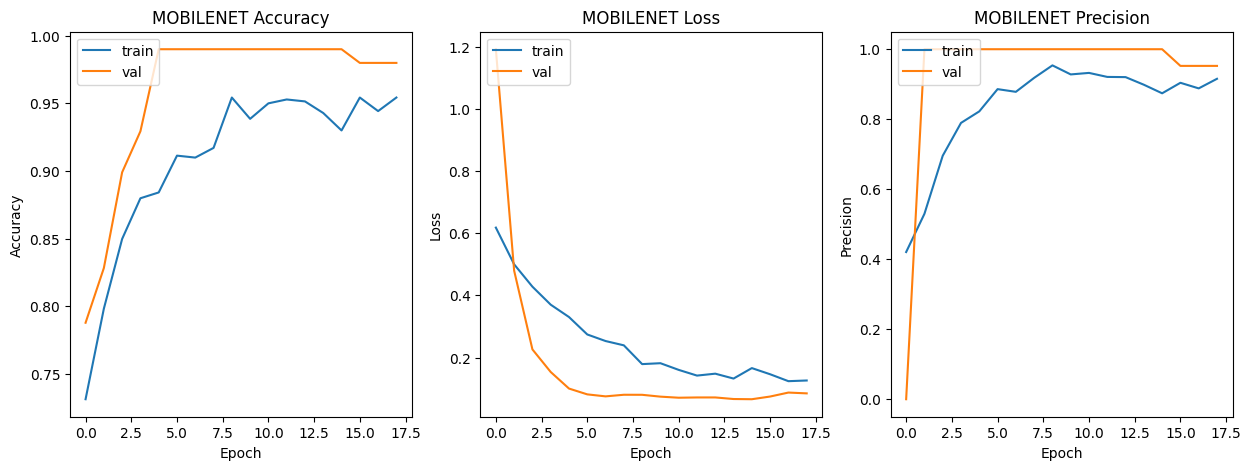

In [ ]:
plot_history(MOBILENET_history, 'MOBILENET')

<h1 align="center" ><a id='vgg19'><b>VGG19<b></a></h1>

In [ ]:
VGG19_base = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG19_base.layers:
    layer.trainable = False

VGG19=tf.keras.Sequential()
VGG19.add(VGG19_base)
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Flatten())
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG19.summary()

VGG19.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_8 (Bat  (None, 25088)             100352    
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 32)                802848    
                                                                 
 batch_normalization_9 (Bat  (None, 32)                

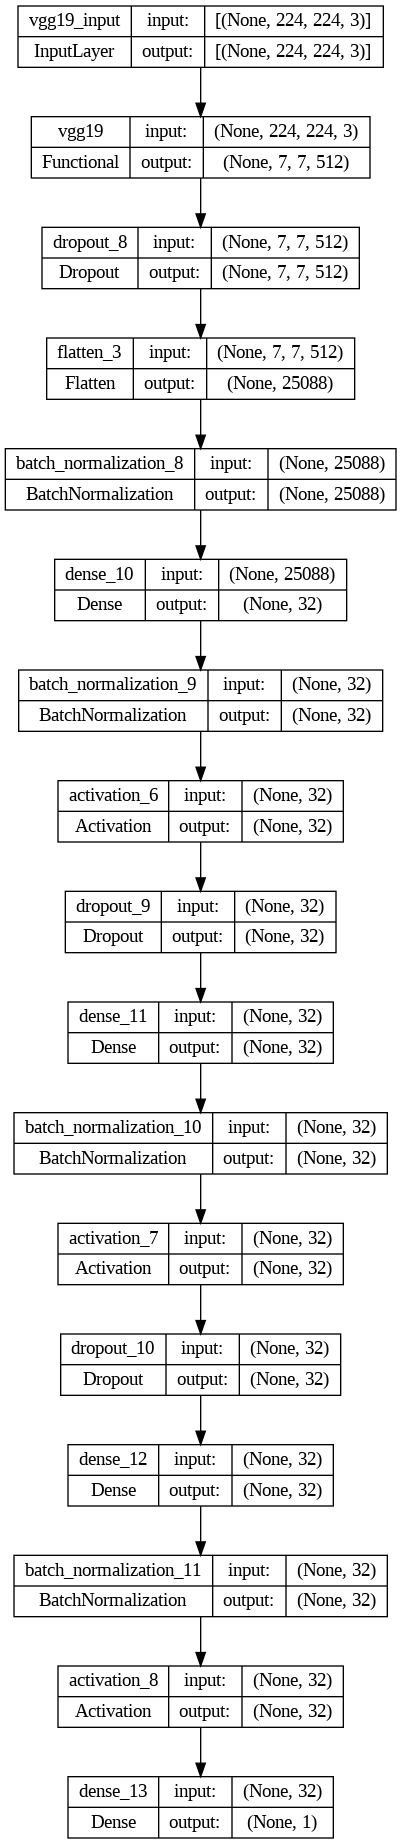

In [ ]:
tf.keras.utils.plot_model(VGG19, to_file='./VGG19.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG19.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG19.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG19_history = VGG19.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.5922 - Accuracy: 0.7603 - Precision: 0.4444 - Recall: 0.4536 - AUC: 0.7468 - F1: 0.2985

22/22 [==============================] - 17s 622ms/step - loss: 0.5922 - Accuracy: 0.7603 - Precision: 0.4444 - Recall: 0.4536 - AUC: 0.7468 - F1: 0.2985 - val_loss: 0.5056 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6334 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5171 - Accuracy: 0.7697 - Precision: 0.4154 - Recall: 0.1800 - AUC: 0.6907 - F1: 0.2231

22/22 [==============================] - 14s 614ms/step - loss: 0.5171 - Accuracy: 0.7697 - Precision: 0.4154 - Recall: 0.1800 - AUC: 0.6907 - F1: 0.2231 - val_loss: 0.5025 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6648 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4849 - Accuracy: 0.7940 - Precision: 0.5750 - Recall: 0.1533 - AUC: 0.7246 - F1: 0.2134

22/22 [==============================] - 14s 620ms/step - loss: 0.4849 - Accuracy: 0.7940 - Precision: 0.5750 - Recall: 0.1533 - AUC: 0.7246 - F1: 0.2134 - val_loss: 0.4459 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8794 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4503 - Accuracy: 0.7926 - Precision: 0.5758 - Recall: 0.1267 - AUC: 0.7678 - F1: 0.1872

22/22 [==============================] - 14s 620ms/step - loss: 0.4503 - Accuracy: 0.7926 - Precision: 0.5758 - Recall: 0.1267 - AUC: 0.7678 - F1: 0.1872 - val_loss: 0.4396 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9777 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4303 - Accuracy: 0.8026 - Precision: 0.6667 - Recall: 0.1600 - AUC: 0.8024 - F1: 0.2270

22/22 [==============================] - 14s 615ms/step - loss: 0.4303 - Accuracy: 0.8026 - Precision: 0.6667 - Recall: 0.1600 - AUC: 0.8024 - F1: 0.2270 - val_loss: 0.4092 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9857 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.4203 - Accuracy: 0.8026 - Precision: 0.6579 - Recall: 0.1667 - AUC: 0.8110 - F1: 0.2647

22/22 [==============================] - 13s 608ms/step - loss: 0.4203 - Accuracy: 0.8026 - Precision: 0.6579 - Recall: 0.1667 - AUC: 0.8110 - F1: 0.2647 - val_loss: 0.3563 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9908 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3770 - Accuracy: 0.8069 - Precision: 0.6744 - Recall: 0.1933 - AUC: 0.8778 - F1: 0.2712

22/22 [==============================] - 14s 621ms/step - loss: 0.3770 - Accuracy: 0.8069 - Precision: 0.6744 - Recall: 0.1933 - AUC: 0.8778 - F1: 0.2712 - val_loss: 0.3462 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9875 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3706 - Accuracy: 0.8312 - Precision: 0.7286 - Recall: 0.3400 - AUC: 0.8713 - F1: 0.4592

22/22 [==============================] - 14s 621ms/step - loss: 0.3706 - Accuracy: 0.8312 - Precision: 0.7286 - Recall: 0.3400 - AUC: 0.8713 - F1: 0.4592 - val_loss: 0.3078 - val_Accuracy: 0.8081 - val_Precision: 1.0000 - val_Recall: 0.0952 - val_AUC: 0.9869 - val_F1: 0.1250 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.3391 - Accuracy: 0.8441 - Precision: 0.7808 - Recall: 0.3800 - AUC: 0.9070 - F1: 0.4845

22/22 [==============================] - 14s 635ms/step - loss: 0.3391 - Accuracy: 0.8441 - Precision: 0.7808 - Recall: 0.3800 - AUC: 0.9070 - F1: 0.4845 - val_loss: 0.2766 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.9838 - val_F1: 0.2381 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3124 - Accuracy: 0.8641 - Precision: 0.7723 - Recall: 0.5200 - AUC: 0.9235 - F1: 0.6163

22/22 [==============================] - 14s 630ms/step - loss: 0.3124 - Accuracy: 0.8641 - Precision: 0.7723 - Recall: 0.5200 - AUC: 0.9235 - F1: 0.6163 - val_loss: 0.2119 - val_Accuracy: 0.9091 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9933 - val_F1: 0.5439 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.3126 - Accuracy: 0.8655 - Precision: 0.7800 - Recall: 0.5200 - AUC: 0.9201 - F1: 0.6088

22/22 [==============================] - 13s 606ms/step - loss: 0.3126 - Accuracy: 0.8655 - Precision: 0.7800 - Recall: 0.5200 - AUC: 0.9201 - F1: 0.6088 - val_loss: 0.1834 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9826 - val_F1: 0.9273 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2894 - Accuracy: 0.8727 - Precision: 0.7652 - Recall: 0.5867 - AUC: 0.9315 - F1: 0.6478

22/22 [==============================] - 13s 612ms/step - loss: 0.2894 - Accuracy: 0.8727 - Precision: 0.7652 - Recall: 0.5867 - AUC: 0.9315 - F1: 0.6478 - val_loss: 0.1677 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9847 - val_F1: 0.7141 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2858 - Accuracy: 0.8670 - Precision: 0.7395 - Recall: 0.5867 - AUC: 0.9280 - F1: 0.6363

22/22 [==============================] - 14s 612ms/step - loss: 0.2858 - Accuracy: 0.8670 - Precision: 0.7395 - Recall: 0.5867 - AUC: 0.9280 - F1: 0.6363 - val_loss: 0.1533 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9838 - val_F1: 0.7222 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.2691 - Accuracy: 0.8856 - Precision: 0.7612 - Recall: 0.6800 - AUC: 0.9392 - F1: 0.7050

22/22 [==============================] - 14s 618ms/step - loss: 0.2691 - Accuracy: 0.8856 - Precision: 0.7612 - Recall: 0.6800 - AUC: 0.9392 - F1: 0.7050 - val_loss: 0.1330 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9951 - val_F1: 0.7161 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.2566 - Accuracy: 0.9041 - Precision: 0.8168 - Recall: 0.7133 - AUC: 0.9466 - F1: 0.7625

22/22 [==============================] - 14s 612ms/step - loss: 0.2566 - Accuracy: 0.9041 - Precision: 0.8168 - Recall: 0.7133 - AUC: 0.9466 - F1: 0.7625 - val_loss: 0.1323 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9820 - val_F1: 0.9583 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.2526 - Accuracy: 0.8941 - Precision: 0.7969 - Recall: 0.6800 - AUC: 0.9439 - F1: 0.7291

22/22 [==============================] - 14s 615ms/step - loss: 0.2526 - Accuracy: 0.8941 - Precision: 0.7969 - Recall: 0.6800 - AUC: 0.9439 - F1: 0.7291 - val_loss: 0.1266 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.7222 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.2441 - Accuracy: 0.8870 - Precision: 0.7630 - Recall: 0.6867 - AUC: 0.9465 - F1: 0.7004

22/22 [==============================] - 13s 608ms/step - loss: 0.2441 - Accuracy: 0.8870 - Precision: 0.7630 - Recall: 0.6867 - AUC: 0.9465 - F1: 0.7004 - val_loss: 0.1091 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.7308 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.2181 - Accuracy: 0.9113 - Precision: 0.7895 - Recall: 0.8000 - AUC: 0.9621 - F1: 0.7952

22/22 [==============================] - 14s 615ms/step - loss: 0.2181 - Accuracy: 0.9113 - Precision: 0.7895 - Recall: 0.8000 - AUC: 0.9621 - F1: 0.7952 - val_loss: 0.1171 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9799 - val_F1: 0.7091 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.2495 - Accuracy: 0.8884 - Precision: 0.7571 - Recall: 0.7067 - AUC: 0.9425 - F1: 0.6819

22/22 [==============================] - 14s 621ms/step - loss: 0.2495 - Accuracy: 0.8884 - Precision: 0.7571 - Recall: 0.7067 - AUC: 0.9425 - F1: 0.6819 - val_loss: 0.0933 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9924 - val_F1: 0.7308 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.2050 - Accuracy: 0.9113 - Precision: 0.8143 - Recall: 0.7600 - AUC: 0.9650 - F1: 0.7804

22/22 [==============================] - 13s 609ms/step - loss: 0.2050 - Accuracy: 0.9113 - Precision: 0.8143 - Recall: 0.7600 - AUC: 0.9650 - F1: 0.7804 - val_loss: 0.0963 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9911 - val_F1: 0.9853 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.1973 - Accuracy: 0.9256 - Precision: 0.8356 - Recall: 0.8133 - AUC: 0.9656 - F1: 0.8188

22/22 [==============================] - 14s 621ms/step - loss: 0.1973 - Accuracy: 0.9256 - Precision: 0.8356 - Recall: 0.8133 - AUC: 0.9656 - F1: 0.8188 - val_loss: 0.0961 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9908 - val_F1: 0.7273 - lr: 0.0010
Epoch 22/36
22/22 [==============================] - ETA: 0s - loss: 0.2088 - Accuracy: 0.9127 - Precision: 0.8112 - Recall: 0.7733 - AUC: 0.9611 - F1: 0.7863
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 14s 616ms/step - loss: 0.2088 - Accuracy: 0.9127 - Precision: 0.8112 - Recall: 0.7733 - AUC: 0.9611 - F1: 0.7863 - val_loss: 0.0985 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9905 - val_F1: 0.9808 - lr: 0.0010
Epoch 22: early stopping


In [ ]:
VGG19_scores = VGG19.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 166ms/step - loss: 0.0900 - Accuracy: 0.9703 - Precision: 0.8800 - Recall: 1.0000 - AUC: 0.9983 - F1: 0.8808


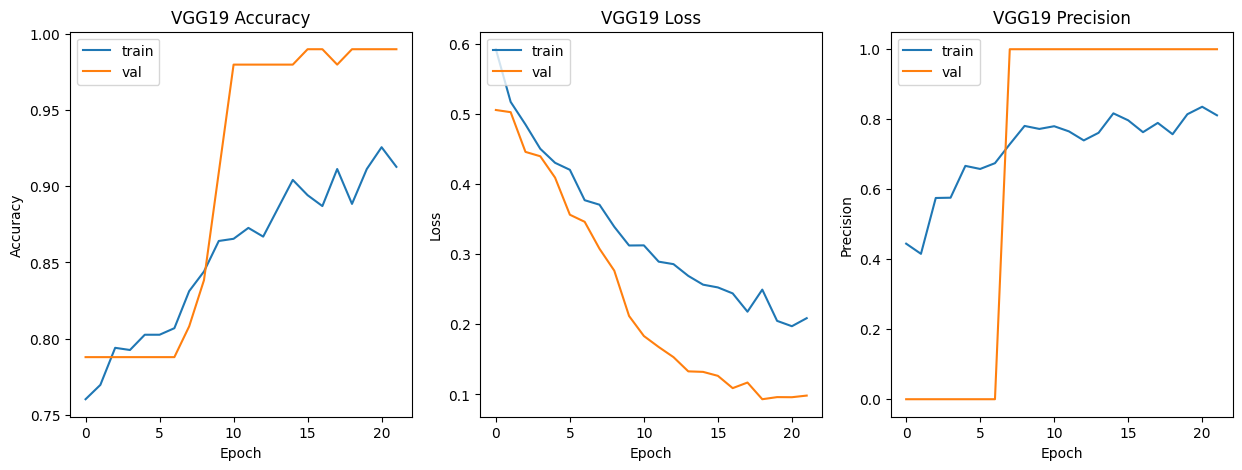

In [ ]:
plot_history(VGG19_history, 'VGG19')

<h1 align="center" ><a id='xception'><b>Xception<b></a></h1>

In [ ]:
Xception_base = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in Xception_base.layers:
    layer.trainable = False

Xception=tf.keras.Sequential()
Xception.add(Xception_base)
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Flatten())
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dense(1,activation='sigmoid'))

Xception.summary()

Xception.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_16 (Ba  (None, 100352)            401408    
 tchNormalization)                                               
                                                                 
 dense_14 (Dense)            (None, 32)                3211296   
                                                                 
 batch_normalization_17 (Ba  (None, 32)                

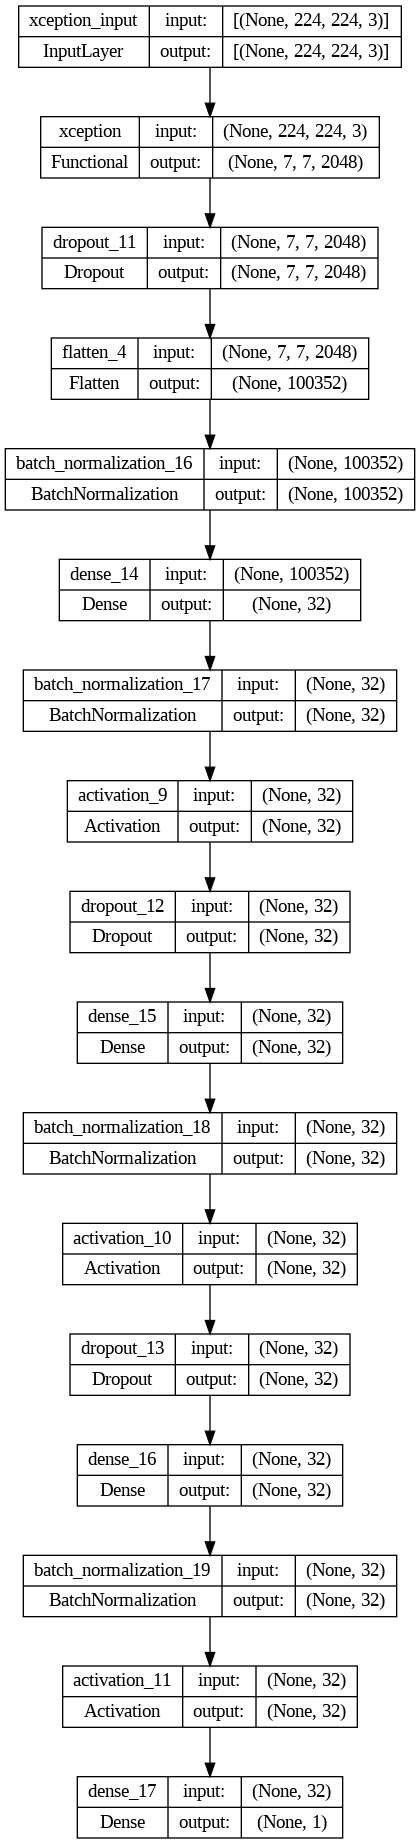

In [ ]:
tf.keras.utils.plot_model(Xception, to_file='./Xception.png', show_shapes=True,show_layer_names=True)
Image(filename='Xception.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('Xception.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

Xception_history = Xception.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.5405 - Accuracy: 0.7902 - Precision: 0.5138 - Recall: 0.4794 - AUC: 0.7812 - F1: 0.3475

22/22 [==============================] - 23s 830ms/step - loss: 0.5405 - Accuracy: 0.7902 - Precision: 0.5138 - Recall: 0.4794 - AUC: 0.7812 - F1: 0.3475 - val_loss: 0.3612 - val_Accuracy: 0.8081 - val_Precision: 1.0000 - val_Recall: 0.0952 - val_AUC: 0.9463 - val_F1: 0.1429 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4445 - Accuracy: 0.7840 - Precision: 0.4950 - Recall: 0.3333 - AUC: 0.7912 - F1: 0.3795

22/22 [==============================] - 13s 595ms/step - loss: 0.4445 - Accuracy: 0.7840 - Precision: 0.4950 - Recall: 0.3333 - AUC: 0.7912 - F1: 0.3795 - val_loss: 0.2318 - val_Accuracy: 0.9091 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9799 - val_F1: 0.7889 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4234 - Accuracy: 0.8026 - Precision: 0.5698 - Recall: 0.3267 - AUC: 0.8120 - F1: 0.3735

22/22 [==============================] - 13s 606ms/step - loss: 0.4234 - Accuracy: 0.8026 - Precision: 0.5698 - Recall: 0.3267 - AUC: 0.8120 - F1: 0.3735 - val_loss: 0.2633 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9591 - val_F1: 0.5229 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3538 - Accuracy: 0.8641 - Precision: 0.7619 - Recall: 0.5333 - AUC: 0.8921 - F1: 0.6189

22/22 [==============================] - 13s 603ms/step - loss: 0.3538 - Accuracy: 0.8641 - Precision: 0.7619 - Recall: 0.5333 - AUC: 0.8921 - F1: 0.6189 - val_loss: 0.2665 - val_Accuracy: 0.9293 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9292 - val_F1: 0.6183 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3260 - Accuracy: 0.8512 - Precision: 0.7170 - Recall: 0.5067 - AUC: 0.9160 - F1: 0.5747

22/22 [==============================] - 13s 596ms/step - loss: 0.3260 - Accuracy: 0.8512 - Precision: 0.7170 - Recall: 0.5067 - AUC: 0.9160 - F1: 0.5747 - val_loss: 0.2289 - val_Accuracy: 0.9394 - val_Precision: 0.9412 - val_Recall: 0.7619 - val_AUC: 0.9551 - val_F1: 0.6568 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3019 - Accuracy: 0.8684 - Precision: 0.7458 - Recall: 0.5867 - AUC: 0.9243 - F1: 0.6508

22/22 [==============================] - 13s 592ms/step - loss: 0.3019 - Accuracy: 0.8684 - Precision: 0.7458 - Recall: 0.5867 - AUC: 0.9243 - F1: 0.6508 - val_loss: 0.1908 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9829 - val_F1: 0.6433 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2687 - Accuracy: 0.8956 - Precision: 0.7939 - Recall: 0.6933 - AUC: 0.9482 - F1: 0.7292

22/22 [==============================] - 13s 599ms/step - loss: 0.2687 - Accuracy: 0.8956 - Precision: 0.7939 - Recall: 0.6933 - AUC: 0.9482 - F1: 0.7292 - val_loss: 0.1667 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9915 - val_F1: 0.8390 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2488 - Accuracy: 0.8913 - Precision: 0.8083 - Recall: 0.6467 - AUC: 0.9498 - F1: 0.7136

22/22 [==============================] - 13s 593ms/step - loss: 0.2488 - Accuracy: 0.8913 - Precision: 0.8083 - Recall: 0.6467 - AUC: 0.9498 - F1: 0.7136 - val_loss: 0.1393 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9988 - val_F1: 0.9687 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2352 - Accuracy: 0.9099 - Precision: 0.8372 - Recall: 0.7200 - AUC: 0.9537 - F1: 0.7705

22/22 [==============================] - 13s 598ms/step - loss: 0.2352 - Accuracy: 0.9099 - Precision: 0.8372 - Recall: 0.7200 - AUC: 0.9537 - F1: 0.7705 - val_loss: 0.1275 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9982 - val_F1: 0.9222 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2194 - Accuracy: 0.9299 - Precision: 0.8483 - Recall: 0.8200 - AUC: 0.9645 - F1: 0.8214

22/22 [==============================] - 13s 597ms/step - loss: 0.2194 - Accuracy: 0.9299 - Precision: 0.8483 - Recall: 0.8200 - AUC: 0.9645 - F1: 0.8214 - val_loss: 0.1289 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9973 - val_F1: 0.9020 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2100 - Accuracy: 0.9170 - Precision: 0.8194 - Recall: 0.7867 - AUC: 0.9631 - F1: 0.7823

22/22 [==============================] - 13s 595ms/step - loss: 0.2100 - Accuracy: 0.9170 - Precision: 0.8194 - Recall: 0.7867 - AUC: 0.9631 - F1: 0.7823 - val_loss: 0.1297 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9939 - val_F1: 0.6726 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1869 - Accuracy: 0.9242 - Precision: 0.8255 - Recall: 0.8200 - AUC: 0.9718 - F1: 0.8146
Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 13s 590ms/step - loss: 0.1869 - Accuracy: 0.9242 - Precision: 0.8255 - Recall: 0.8200 - AUC: 0.9718 - F1: 0.8146 - val_loss: 0.1367 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9948 - val_F1: 0.9313 - lr: 0.0010
Epoch 12: early stopping


In [ ]:
Xception_scores = Xception.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 3s 493ms/step - loss: 0.1189 - Accuracy: 0.9703 - Precision: 0.8800 - Recall: 1.0000 - AUC: 0.9984 - F1: 0.9413


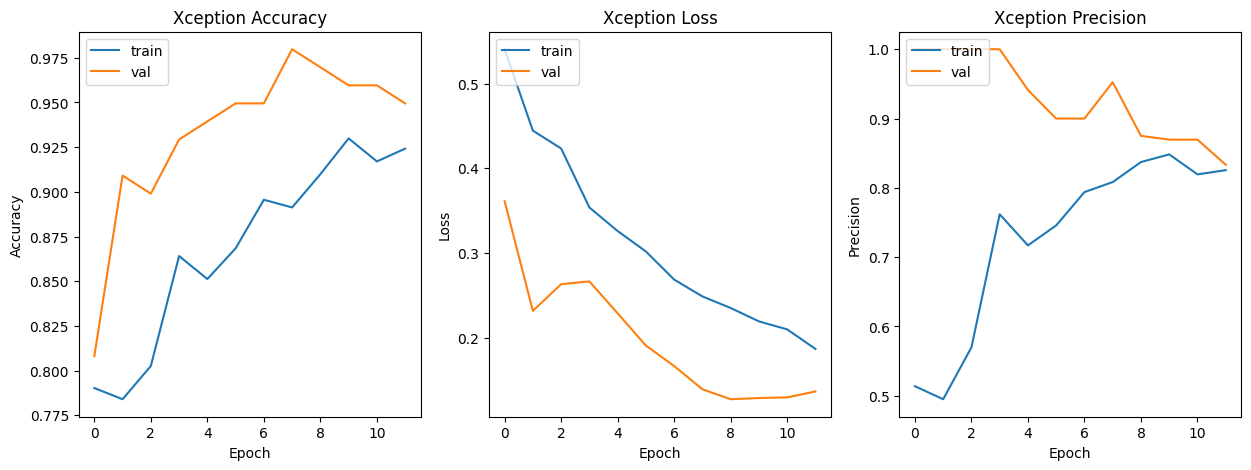

In [ ]:
plot_history(Xception_history, 'Xception')

<h1 align="center" ><a id='inceptionv3'><b>InceptionV3<b></a></h1>

In [ ]:
InceptionV3_base = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in InceptionV3_base.layers:
    layer.trainable = False

InceptionV3=tf.keras.Sequential()
InceptionV3.add(InceptionV3_base)
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Flatten())
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

InceptionV3.summary()

InceptionV3.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout_14 (Dropout)        (None, 5, 5, 2048)        0         
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_114 (B  (None, 51200)             204800    
 atchNormalization)                                              
                                                                 
 dense_18 (Dense)            (None, 32)                1638432   
                                                                 
 batch_normalization_115 (B  (None, 32)                

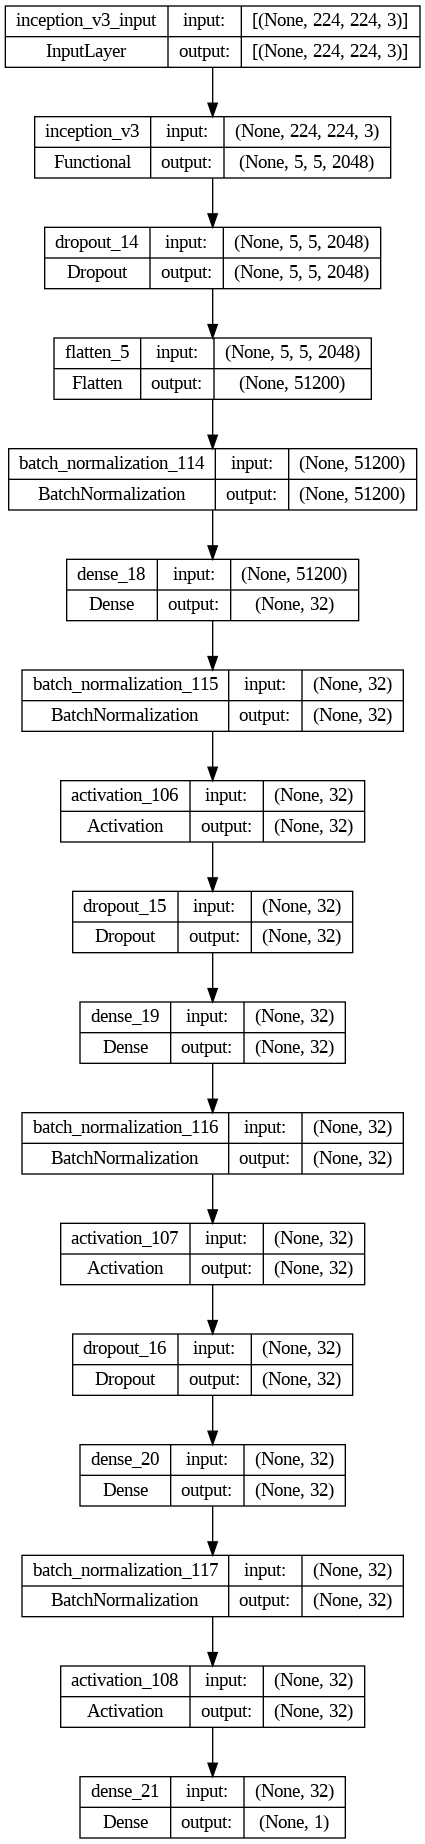

In [ ]:
tf.keras.utils.plot_model(InceptionV3, to_file='./InceptionV3.png', show_shapes=True,show_layer_names=True)
Image(filename='InceptionV3.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('InceptionV3.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

InceptionV3_history = InceptionV3.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6914 - Accuracy: 0.6615 - Precision: 0.3595 - Recall: 0.7320 - AUC: 0.7839 - F1: 0.4021

22/22 [==============================] - 25s 751ms/step - loss: 0.6914 - Accuracy: 0.6615 - Precision: 0.3595 - Recall: 0.7320 - AUC: 0.7839 - F1: 0.4021 - val_loss: 0.2889 - val_Accuracy: 0.8788 - val_Precision: 0.9091 - val_Recall: 0.4762 - val_AUC: 0.9228 - val_F1: 0.4697 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5686 - Accuracy: 0.7525 - Precision: 0.4422 - Recall: 0.5867 - AUC: 0.7320 - F1: 0.4988

22/22 [==============================] - 13s 584ms/step - loss: 0.5686 - Accuracy: 0.7525 - Precision: 0.4422 - Recall: 0.5867 - AUC: 0.7320 - F1: 0.4988 - val_loss: 0.1972 - val_Accuracy: 0.9394 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9789 - val_F1: 0.6375 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4693 - Accuracy: 0.8255 - Precision: 0.5959 - Recall: 0.5800 - AUC: 0.8245 - F1: 0.5889

22/22 [==============================] - 13s 577ms/step - loss: 0.4693 - Accuracy: 0.8255 - Precision: 0.5959 - Recall: 0.5800 - AUC: 0.8245 - F1: 0.5889 - val_loss: 0.1779 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9887 - val_F1: 0.6310 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3902 - Accuracy: 0.8727 - Precision: 0.7563 - Recall: 0.6000 - AUC: 0.8917 - F1: 0.6531

22/22 [==============================] - 13s 584ms/step - loss: 0.3902 - Accuracy: 0.8727 - Precision: 0.7563 - Recall: 0.6000 - AUC: 0.8917 - F1: 0.6531 - val_loss: 0.1531 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9927 - val_F1: 0.9333 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3666 - Accuracy: 0.8856 - Precision: 0.8182 - Recall: 0.6000 - AUC: 0.8767 - F1: 0.6795

22/22 [==============================] - 13s 583ms/step - loss: 0.3666 - Accuracy: 0.8856 - Precision: 0.8182 - Recall: 0.6000 - AUC: 0.8767 - F1: 0.6795 - val_loss: 0.1502 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9988 - val_F1: 0.9643 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3078 - Accuracy: 0.8984 - Precision: 0.8160 - Recall: 0.6800 - AUC: 0.9241 - F1: 0.7405

22/22 [==============================] - 13s 574ms/step - loss: 0.3078 - Accuracy: 0.8984 - Precision: 0.8160 - Recall: 0.6800 - AUC: 0.9241 - F1: 0.7405 - val_loss: 0.1473 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9988 - val_F1: 0.7161 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2968 - Accuracy: 0.8884 - Precision: 0.8333 - Recall: 0.6000 - AUC: 0.9338 - F1: 0.6974

22/22 [==============================] - 13s 584ms/step - loss: 0.2968 - Accuracy: 0.8884 - Precision: 0.8333 - Recall: 0.6000 - AUC: 0.9338 - F1: 0.6974 - val_loss: 0.1381 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9994 - val_F1: 0.9583 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2476 - Accuracy: 0.9113 - Precision: 0.8667 - Recall: 0.6933 - AUC: 0.9595 - F1: 0.7618

22/22 [==============================] - 13s 586ms/step - loss: 0.2476 - Accuracy: 0.9113 - Precision: 0.8667 - Recall: 0.6933 - AUC: 0.9595 - F1: 0.7618 - val_loss: 0.1270 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9976 - val_F1: 0.7161 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2337 - Accuracy: 0.9199 - Precision: 0.8561 - Recall: 0.7533 - AUC: 0.9634 - F1: 0.7829

22/22 [==============================] - 13s 570ms/step - loss: 0.2337 - Accuracy: 0.9199 - Precision: 0.8561 - Recall: 0.7533 - AUC: 0.9634 - F1: 0.7829 - val_loss: 0.1018 - val_Accuracy: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_AUC: 1.0000 - val_F1: 0.7500 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2308 - Accuracy: 0.9041 - Precision: 0.8320 - Recall: 0.6933 - AUC: 0.9535 - F1: 0.7565

22/22 [==============================] - 13s 577ms/step - loss: 0.2308 - Accuracy: 0.9041 - Precision: 0.8320 - Recall: 0.6933 - AUC: 0.9535 - F1: 0.7565 - val_loss: 0.1126 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.8818 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.1944 - Accuracy: 0.9399 - Precision: 0.9219 - Recall: 0.7867 - AUC: 0.9701 - F1: 0.8467

22/22 [==============================] - 13s 583ms/step - loss: 0.1944 - Accuracy: 0.9399 - Precision: 0.9219 - Recall: 0.7867 - AUC: 0.9701 - F1: 0.8467 - val_loss: 0.0953 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9982 - val_F1: 0.9126 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2029 - Accuracy: 0.9227 - Precision: 0.8636 - Recall: 0.7600 - AUC: 0.9661 - F1: 0.8070

22/22 [==============================] - 13s 578ms/step - loss: 0.2029 - Accuracy: 0.9227 - Precision: 0.8636 - Recall: 0.7600 - AUC: 0.9661 - F1: 0.8070 - val_loss: 0.0891 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.8523 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2010 - Accuracy: 0.9185 - Precision: 0.8496 - Recall: 0.7533 - AUC: 0.9627 - F1: 0.7860

22/22 [==============================] - 13s 589ms/step - loss: 0.2010 - Accuracy: 0.9185 - Precision: 0.8496 - Recall: 0.7533 - AUC: 0.9627 - F1: 0.7860 - val_loss: 0.1176 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9945 - val_F1: 0.9248 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.2065 - Accuracy: 0.9170 - Precision: 0.8382 - Recall: 0.7600 - AUC: 0.9612 - F1: 0.7948

22/22 [==============================] - 13s 580ms/step - loss: 0.2065 - Accuracy: 0.9170 - Precision: 0.8382 - Recall: 0.7600 - AUC: 0.9612 - F1: 0.7948 - val_loss: 0.0975 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9963 - val_F1: 0.7021 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1945 - Accuracy: 0.9227 - Precision: 0.8750 - Recall: 0.7467 - AUC: 0.9697 - F1: 0.8039

22/22 [==============================] - 13s 576ms/step - loss: 0.1945 - Accuracy: 0.9227 - Precision: 0.8750 - Recall: 0.7467 - AUC: 0.9697 - F1: 0.8039 - val_loss: 0.0757 - val_Accuracy: 0.9798 - val_Precision: 0.9130 - val_Recall: 1.0000 - val_AUC: 0.9960 - val_F1: 0.7188 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1732 - Accuracy: 0.9413 - Precision: 0.8811 - Recall: 0.8400 - AUC: 0.9739 - F1: 0.8428

22/22 [==============================] - 13s 581ms/step - loss: 0.1732 - Accuracy: 0.9413 - Precision: 0.8811 - Recall: 0.8400 - AUC: 0.9739 - F1: 0.8428 - val_loss: 0.0809 - val_Accuracy: 0.9798 - val_Precision: 0.9130 - val_Recall: 1.0000 - val_AUC: 0.9957 - val_F1: 0.9722 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1344 - Accuracy: 0.9599 - Precision: 0.9621 - Recall: 0.8467 - AUC: 0.9848 - F1: 0.8962

22/22 [==============================] - 13s 587ms/step - loss: 0.1344 - Accuracy: 0.9599 - Precision: 0.9621 - Recall: 0.8467 - AUC: 0.9848 - F1: 0.8962 - val_loss: 0.0863 - val_Accuracy: 0.9798 - val_Precision: 0.9130 - val_Recall: 1.0000 - val_AUC: 0.9951 - val_F1: 0.9661 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1696 - Accuracy: 0.9442 - Precision: 0.8993 - Recall: 0.8333 - AUC: 0.9725 - F1: 0.8632
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 13s 589ms/step - loss: 0.1696 - Accuracy: 0.9442 - Precision: 0.8993 - Recall: 0.8333 - AUC: 0.9725 - F1: 0.8632 - val_loss: 0.0946 - val_Accuracy: 0.9495 - val_Precision: 0.9000 - val_Recall: 0.8571 - val_AUC: 0.9951 - val_F1: 0.9080 - lr: 0.0010
Epoch 18: early stopping


In [ ]:
InceptionV3_scores = InceptionV3.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 3s 460ms/step - loss: 0.0931 - Accuracy: 0.9505 - Precision: 0.9048 - Recall: 0.8636 - AUC: 0.9950 - F1: 0.8842


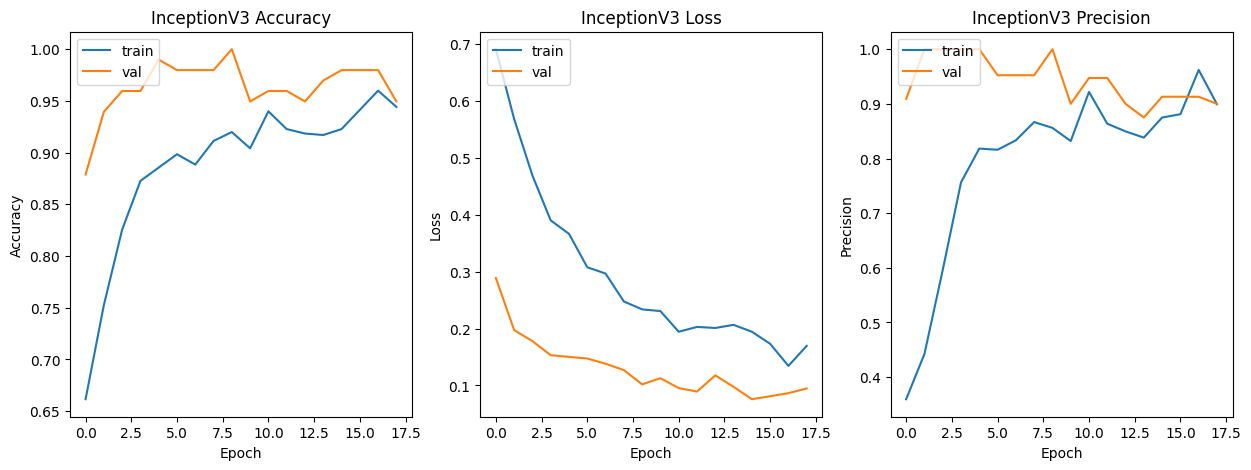

In [ ]:
plot_history(InceptionV3_history, 'InceptionV3')

<h1 align="center" ><a id='resnet50'><b>ResNet50<b></a></h1>

In [ ]:
ResNet50_base = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in ResNet50_base.layers:
    layer.trainable = False

ResNet50=tf.keras.Sequential()
ResNet50.add(ResNet50_base)
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Flatten())
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ResNet50.summary()

ResNet50.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_17 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_118 (B  (None, 100352)            401408    
 atchNormalization)                                              
                                                                 
 dense_22 (Dense)            (None, 32)                3211296   
                                                                 
 batch_normalization_119 (B  (None, 32)                

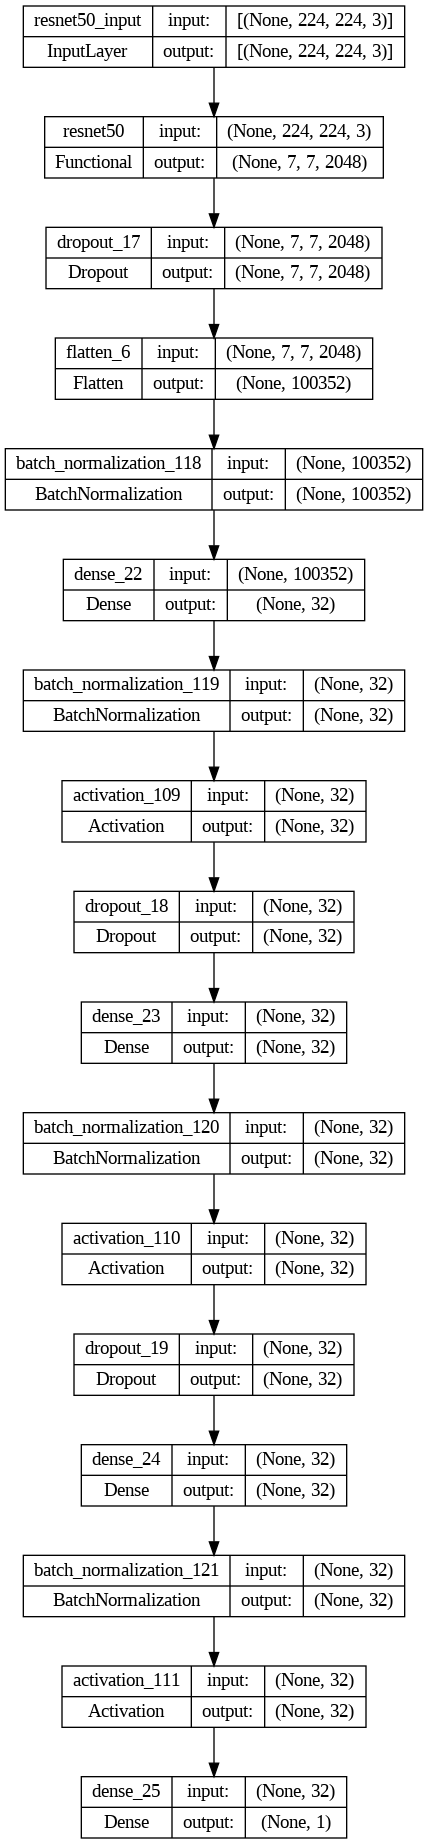

In [ ]:
tf.keras.utils.plot_model(ResNet50, to_file='./ResNet50.png', show_shapes=True,show_layer_names=True)
Image(filename='ResNet50.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('ResNet50.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

ResNet50_history = ResNet50.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6148 - Accuracy: 0.7447 - Precision: 0.4118 - Recall: 0.4330 - AUC: 0.7279 - F1: 0.2804

22/22 [==============================] - 22s 725ms/step - loss: 0.6148 - Accuracy: 0.7447 - Precision: 0.4118 - Recall: 0.4330 - AUC: 0.7279 - F1: 0.2804 - val_loss: 0.4391 - val_Accuracy: 0.8081 - val_Precision: 0.7500 - val_Recall: 0.1429 - val_AUC: 0.7903 - val_F1: 0.1769 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5436 - Accuracy: 0.7768 - Precision: 0.4583 - Recall: 0.2200 - AUC: 0.6464 - F1: 0.2796

22/22 [==============================] - 13s 587ms/step - loss: 0.5436 - Accuracy: 0.7768 - Precision: 0.4583 - Recall: 0.2200 - AUC: 0.6464 - F1: 0.2796 - val_loss: 0.4072 - val_Accuracy: 0.7980 - val_Precision: 1.0000 - val_Recall: 0.0476 - val_AUC: 0.9274 - val_F1: 0.1000 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4988 - Accuracy: 0.7954 - Precision: 0.5660 - Recall: 0.2000 - AUC: 0.6881 - F1: 0.2742

22/22 [==============================] - 13s 587ms/step - loss: 0.4988 - Accuracy: 0.7954 - Precision: 0.5660 - Recall: 0.2000 - AUC: 0.6881 - F1: 0.2742 - val_loss: 0.4110 - val_Accuracy: 0.7980 - val_Precision: 1.0000 - val_Recall: 0.0476 - val_AUC: 0.8669 - val_F1: 0.0625 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4919 - Accuracy: 0.7997 - Precision: 0.6042 - Recall: 0.1933 - AUC: 0.6797 - F1: 0.2723

22/22 [==============================] - 13s 600ms/step - loss: 0.4919 - Accuracy: 0.7997 - Precision: 0.6042 - Recall: 0.1933 - AUC: 0.6797 - F1: 0.2723 - val_loss: 0.3538 - val_Accuracy: 0.8081 - val_Precision: 1.0000 - val_Recall: 0.0952 - val_AUC: 0.9237 - val_F1: 0.0769 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4649 - Accuracy: 0.7969 - Precision: 0.6176 - Recall: 0.1400 - AUC: 0.7288 - F1: 0.2147

22/22 [==============================] - 13s 587ms/step - loss: 0.4649 - Accuracy: 0.7969 - Precision: 0.6176 - Recall: 0.1400 - AUC: 0.7288 - F1: 0.2147 - val_loss: 0.2975 - val_Accuracy: 0.9192 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.9301 - val_F1: 0.5720 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.4457 - Accuracy: 0.8054 - Precision: 0.6750 - Recall: 0.1800 - AUC: 0.7715 - F1: 0.2612

22/22 [==============================] - 13s 582ms/step - loss: 0.4457 - Accuracy: 0.8054 - Precision: 0.6750 - Recall: 0.1800 - AUC: 0.7715 - F1: 0.2612 - val_loss: 0.2961 - val_Accuracy: 0.8990 - val_Precision: 0.9231 - val_Recall: 0.5714 - val_AUC: 0.9057 - val_F1: 0.5171 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.4392 - Accuracy: 0.8112 - Precision: 0.7368 - Recall: 0.1867 - AUC: 0.7680 - F1: 0.2759

22/22 [==============================] - 13s 589ms/step - loss: 0.4392 - Accuracy: 0.8112 - Precision: 0.7368 - Recall: 0.1867 - AUC: 0.7680 - F1: 0.2759 - val_loss: 0.2823 - val_Accuracy: 0.8990 - val_Precision: 0.8667 - val_Recall: 0.6190 - val_AUC: 0.9188 - val_F1: 0.5462 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.4234 - Accuracy: 0.8112 - Precision: 0.7045 - Recall: 0.2067 - AUC: 0.7949 - F1: 0.2822

22/22 [==============================] - 13s 587ms/step - loss: 0.4234 - Accuracy: 0.8112 - Precision: 0.7045 - Recall: 0.2067 - AUC: 0.7949 - F1: 0.2822 - val_loss: 0.2611 - val_Accuracy: 0.8990 - val_Precision: 0.8667 - val_Recall: 0.6190 - val_AUC: 0.9435 - val_F1: 0.7590 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.4032 - Accuracy: 0.8340 - Precision: 0.7742 - Recall: 0.3200 - AUC: 0.8194 - F1: 0.4473

22/22 [==============================] - 13s 586ms/step - loss: 0.4032 - Accuracy: 0.8340 - Precision: 0.7742 - Recall: 0.3200 - AUC: 0.8194 - F1: 0.4473 - val_loss: 0.2526 - val_Accuracy: 0.8889 - val_Precision: 0.8125 - val_Recall: 0.6190 - val_AUC: 0.9499 - val_F1: 0.5310 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3766 - Accuracy: 0.8398 - Precision: 0.8393 - Recall: 0.3133 - AUC: 0.8499 - F1: 0.4528

22/22 [==============================] - 13s 593ms/step - loss: 0.3766 - Accuracy: 0.8398 - Precision: 0.8393 - Recall: 0.3133 - AUC: 0.8499 - F1: 0.4528 - val_loss: 0.2417 - val_Accuracy: 0.9091 - val_Precision: 0.8333 - val_Recall: 0.7143 - val_AUC: 0.9405 - val_F1: 0.5448 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.3836 - Accuracy: 0.8455 - Precision: 0.7763 - Recall: 0.3933 - AUC: 0.8443 - F1: 0.5126

22/22 [==============================] - 13s 594ms/step - loss: 0.3836 - Accuracy: 0.8455 - Precision: 0.7763 - Recall: 0.3933 - AUC: 0.8443 - F1: 0.5126 - val_loss: 0.2212 - val_Accuracy: 0.8990 - val_Precision: 0.7895 - val_Recall: 0.7143 - val_AUC: 0.9655 - val_F1: 0.5833 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.3545 - Accuracy: 0.8455 - Precision: 0.7500 - Recall: 0.4200 - AUC: 0.8719 - F1: 0.5288

22/22 [==============================] - 13s 590ms/step - loss: 0.3545 - Accuracy: 0.8455 - Precision: 0.7500 - Recall: 0.4200 - AUC: 0.8719 - F1: 0.5288 - val_loss: 0.2362 - val_Accuracy: 0.9091 - val_Precision: 0.8333 - val_Recall: 0.7143 - val_AUC: 0.9460 - val_F1: 0.8042 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.3756 - Accuracy: 0.8340 - Precision: 0.7576 - Recall: 0.3333 - AUC: 0.8526 - F1: 0.4364

22/22 [==============================] - 14s 624ms/step - loss: 0.3756 - Accuracy: 0.8340 - Precision: 0.7576 - Recall: 0.3333 - AUC: 0.8526 - F1: 0.4364 - val_loss: 0.2124 - val_Accuracy: 0.9192 - val_Precision: 0.8421 - val_Recall: 0.7619 - val_AUC: 0.9579 - val_F1: 0.8152 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.3750 - Accuracy: 0.8269 - Precision: 0.6667 - Recall: 0.3867 - AUC: 0.8546 - F1: 0.4713

22/22 [==============================] - 13s 591ms/step - loss: 0.3750 - Accuracy: 0.8269 - Precision: 0.6667 - Recall: 0.3867 - AUC: 0.8546 - F1: 0.4713 - val_loss: 0.2062 - val_Accuracy: 0.9293 - val_Precision: 0.8889 - val_Recall: 0.7619 - val_AUC: 0.9600 - val_F1: 0.6333 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.3552 - Accuracy: 0.8469 - Precision: 0.7590 - Recall: 0.4200 - AUC: 0.8652 - F1: 0.5466

22/22 [==============================] - 13s 601ms/step - loss: 0.3552 - Accuracy: 0.8469 - Precision: 0.7590 - Recall: 0.4200 - AUC: 0.8652 - F1: 0.5466 - val_loss: 0.2071 - val_Accuracy: 0.9192 - val_Precision: 0.8421 - val_Recall: 0.7619 - val_AUC: 0.9710 - val_F1: 0.7641 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.3429 - Accuracy: 0.8541 - Precision: 0.7500 - Recall: 0.4800 - AUC: 0.8791 - F1: 0.5784

22/22 [==============================] - 13s 590ms/step - loss: 0.3429 - Accuracy: 0.8541 - Precision: 0.7500 - Recall: 0.4800 - AUC: 0.8791 - F1: 0.5784 - val_loss: 0.2008 - val_Accuracy: 0.9293 - val_Precision: 0.8500 - val_Recall: 0.8095 - val_AUC: 0.9756 - val_F1: 0.6368 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.3213 - Accuracy: 0.8670 - Precision: 0.7615 - Recall: 0.5533 - AUC: 0.8922 - F1: 0.6300

22/22 [==============================] - 13s 591ms/step - loss: 0.3213 - Accuracy: 0.8670 - Precision: 0.7615 - Recall: 0.5533 - AUC: 0.8922 - F1: 0.6300 - val_loss: 0.2291 - val_Accuracy: 0.9192 - val_Precision: 0.8095 - val_Recall: 0.8095 - val_AUC: 0.9603 - val_F1: 0.7784 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.3224 - Accuracy: 0.8598 - Precision: 0.7766 - Recall: 0.4867 - AUC: 0.8903 - F1: 0.5910

22/22 [==============================] - 13s 588ms/step - loss: 0.3224 - Accuracy: 0.8598 - Precision: 0.7766 - Recall: 0.4867 - AUC: 0.8903 - F1: 0.5910 - val_loss: 0.2747 - val_Accuracy: 0.8889 - val_Precision: 0.6923 - val_Recall: 0.8571 - val_AUC: 0.9585 - val_F1: 0.5792 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.3300 - Accuracy: 0.8612 - Precision: 0.7573 - Recall: 0.5200 - AUC: 0.8857 - F1: 0.6000
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 13s 597ms/step - loss: 0.3300 - Accuracy: 0.8612 - Precision: 0.7573 - Recall: 0.5200 - AUC: 0.8857 - F1: 0.6000 - val_loss: 0.2485 - val_Accuracy: 0.8687 - val_Precision: 0.6818 - val_Recall: 0.7143 - val_AUC: 0.9585 - val_F1: 0.5226 - lr: 0.0010
Epoch 19: early stopping


In [ ]:
ResNet50_scores = ResNet50.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 333ms/step - loss: 0.2193 - Accuracy: 0.9208 - Precision: 0.7692 - Recall: 0.9091 - AUC: 0.9767 - F1: 0.7146


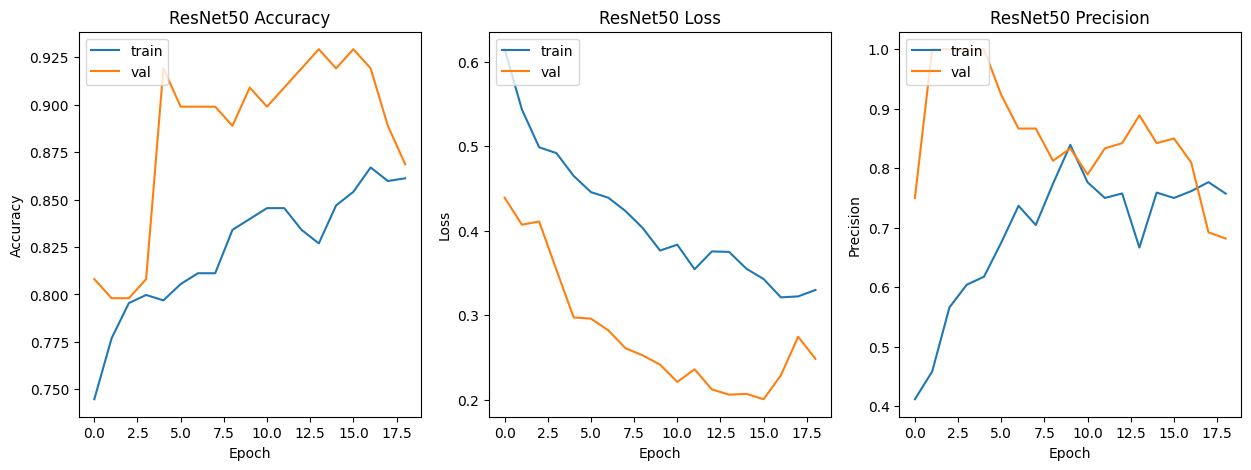

In [ ]:
plot_history(ResNet50_history, 'ResNet50')

<div style='font-size:100%;'>
    <a id='example'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Example: Prediction vs Truth </center>
    </h1>
</div></center>

1/1 [==============================] - 0s 233ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 25ms/step


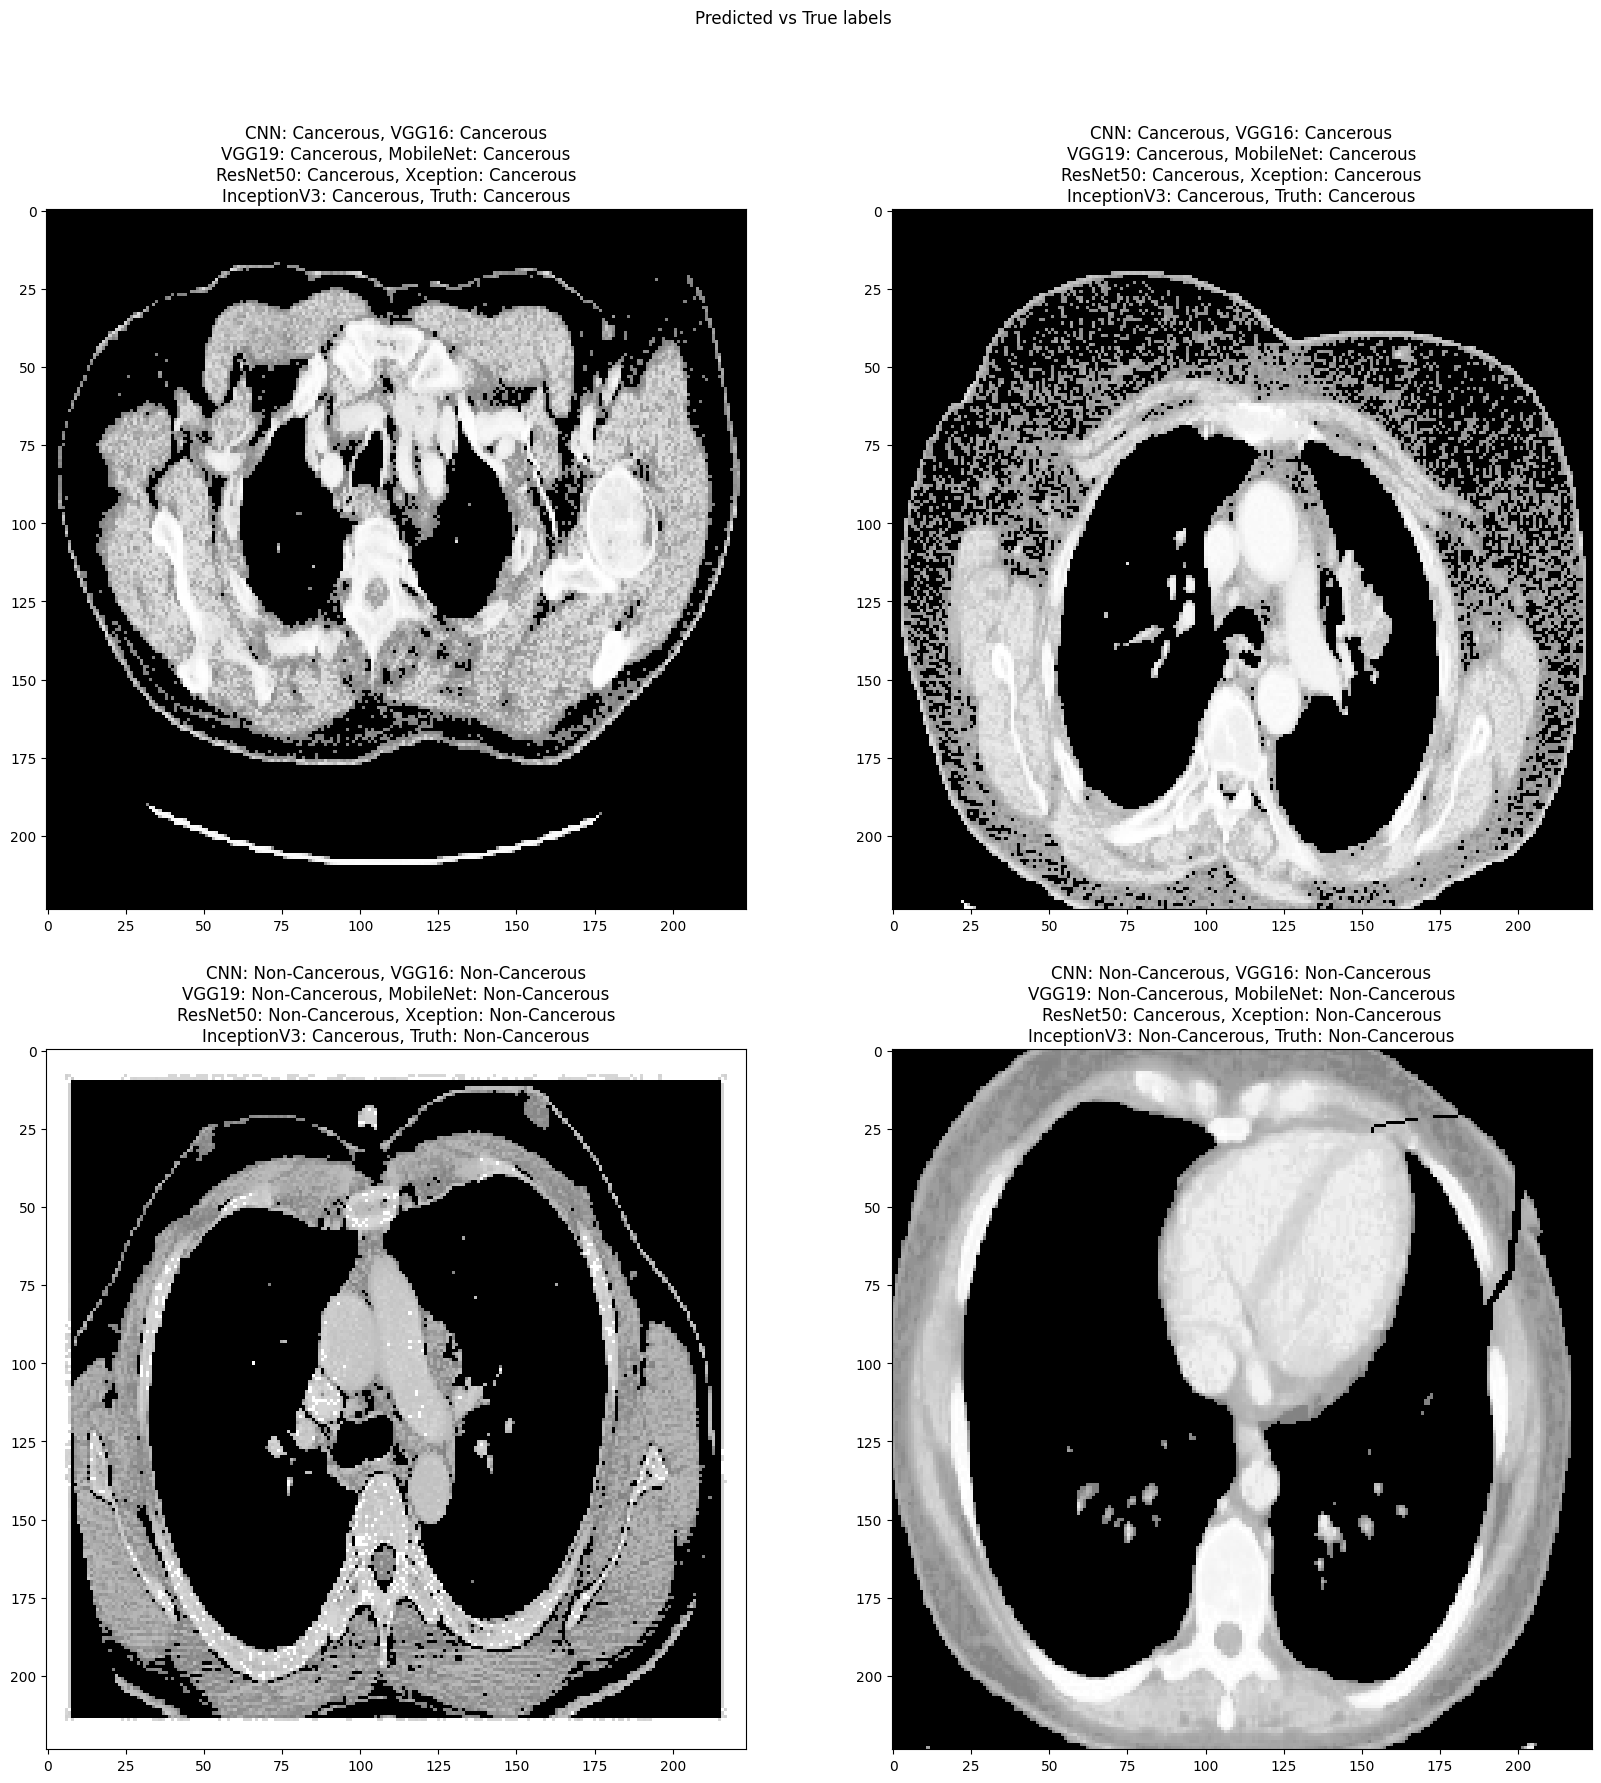

In [ ]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  mobilenetPred = 0 if MOBILENET.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg19Pred = 0 if VGG19.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  xceptionPred = 0 if Xception.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  inceptionv3Pred = 0 if InceptionV3.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  resnet50Pred = 0 if ResNet50.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1

  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}\nVGG19: {label_dict[vgg19Pred]}, MobileNet: {label_dict[mobilenetPred]}\nResNet50: {label_dict[resnet50Pred]}, Xception: {label_dict[xceptionPred]}\nInceptionV3: {label_dict[inceptionv3Pred]}, Truth: {label_dict[int(batch[1][i])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][5])
label = predAll(batch, 1)
ax2.set_title(label)

ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 2)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 3)
ax4.set_title(label)


plt.suptitle('Predicted vs True labels')
plt.show()


In [ ]:
eval = [CNN_scores, VGG16_scores, VGG19_scores, MOBILENET_scores, ResNet50_scores, Xception_scores, InceptionV3_scores]
eval

[[0.3100888133049011,
  0.8712871074676514,
  0.6285714507102966,
  1.0,
  0.9844648241996765,
  0.8041815161705017],
 [0.047127865254879,
  0.9801980257034302,
  0.9166666865348816,
  1.0,
  0.9997124075889587,
  0.9333333969116211],
 [0.08998855948448181,
  0.9702970385551453,
  0.8799999952316284,
  1.0,
  0.9982739090919495,
  0.8808017373085022],
 [0.04061048477888107,
  0.9801980257034302,
  0.9347826242446899,
  0.9772727489471436,
  0.999568521976471,
  0.813025176525116],
 [0.21930672228336334,
  0.9207921028137207,
  0.7692307829856873,
  0.9090909361839294,
  0.9766973257064819,
  0.7146103978157043],
 [0.11893667280673981,
  0.9702970385551453,
  0.8799999952316284,
  1.0,
  0.9984177350997925,
  0.941290020942688],
 [0.09310145676136017,
  0.9504950642585754,
  0.9047619104385376,
  0.8636363744735718,
  0.9950374364852905,
  0.8841871619224548]]

<div style='font-size:100%;'>
    <a id='analysis'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Comparative analysis of the models </center>
    </h1>
</div></center>

In [ ]:
indices = ['CNN', 'VGG16', 'VGG19', 'MobileNet', 'ResNet', 'Xception', 'InceptionV3']
scores = pd.DataFrame({'Accuracy': [item[1] for item in eval],'Precision': [item[2] for item in eval], 'Recall': [item[3] for item in eval], 'AUC': [item[4] for item in eval], 'F1': [item[5] for item in eval]}, index=indices)
scores

,Accuracy,Precision,Recall,AUC,F1
CNN,0.871287,0.628571,1.000000,0.984465,0.804182
VGG16,0.980198,0.916667,1.000000,0.999712,0.933333
VGG19,0.970297,0.880000,1.000000,0.998274,0.880802
MobileNet,0.980198,0.934783,0.977273,0.999569,0.813025
ResNet,0.920792,0.769231,0.909091,0.976697,0.714610
Xception,0.970297,0.880000,1.000000,0.998418,0.941290
InceptionV3,0.950495,0.904762,0.863636,0.995037,0.884187


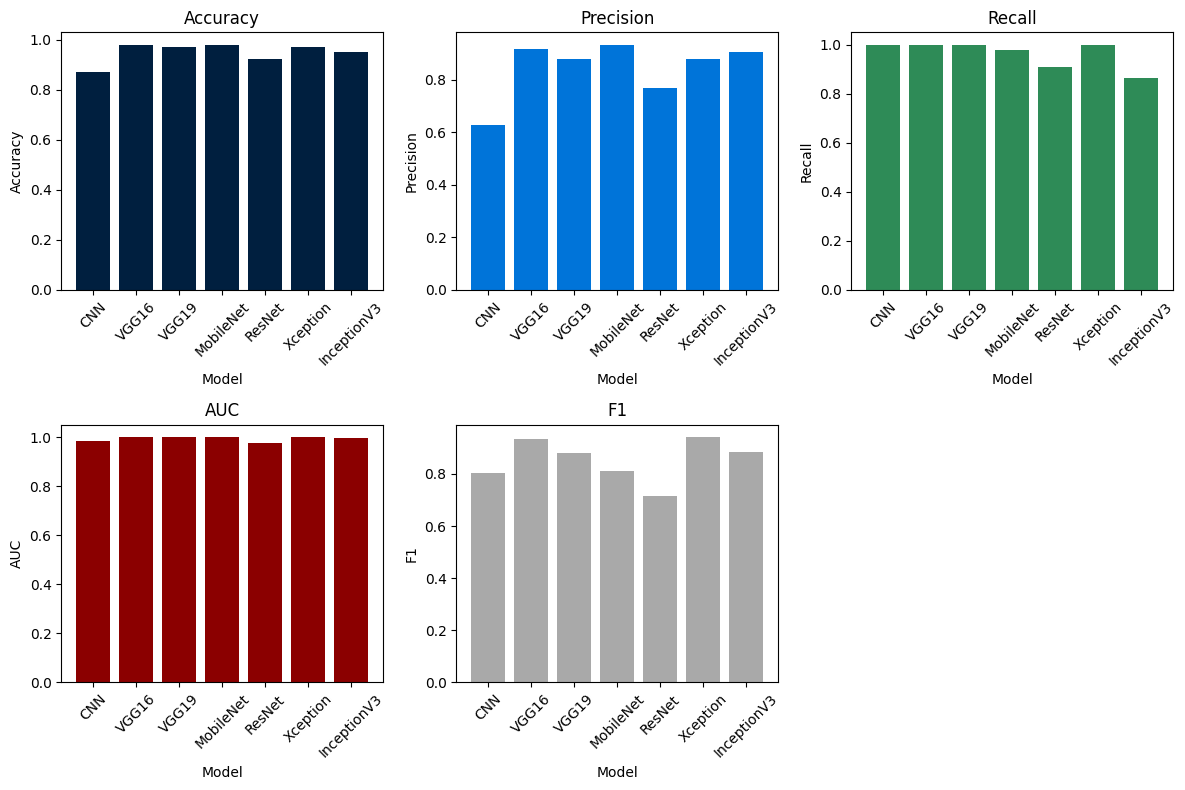

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.ravel()

colors = ['#001f3f', '#0074D9', '#2E8B57', '#8B0000', '#A9A9A9']

for i, column in enumerate(scores.columns):
    axs[i].bar(scores.index, scores[column], color=colors[i])
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column}')
    axs[i].tick_params(axis='x', rotation=45)

for i in range(len(scores.columns), len(axs)):
    plt.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [ ]:
eval = np.array(eval)
np.savetxt('eval.txt', eval)

<div style='font-size:100%;'>
    <a id='references'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> References </center>
    </h1>
</div></center>


1. [1] Tekade, Ruchita, and K. Rajeswari. "Lung cancer detection and classification using deep learning." 2018 Fourth International Conference on Computing Communication Control and Automation (ICCUBEA). IEEE, 2018.
2. [2] Bhatia, Siddharth, Yash Sinha, and Lavika Goel. "Lung cancer detection: a deep learning approach." Soft Computing for Problem Solving. Springer, Singapore, 2019. 699-705.
3. [3] Radhika, P. R., Rakhi AS Nair, and G. Veena. "A comparative study of lung cancer detection using machine learning algorithms." 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT). IEEE, 2019.
4. [4] Shakeel, P. Mohamed, Mohd Aboobaider Burhanuddin, and Mohamad Ishak Desa. "Lung cancer detection from CT image using improved profuse clustering and deep learning instantaneously trained neural networks." Measurement 145 (2019): 702-712.
5. [5] Asuntha, A., and Andy Srinivasan. "Deep learning for lung Cancer detection and classification." Multimedia Tools and Applications 79.11 (2020): 7731-7762.
6. [6] Joshua, Eali Stephen Neal, Midhun Chakkravarthy, and Debnath Bhattacharyya. "An Extensive Review on Lung Cancer Detection Using Machine Learning Techniques: A Systematic Study." Rev. d'Intelligence Artif. 34.3 (2020): 351-359.
7. [7] Alsinglawi, Belal, et al. "An explainable machine learning framework for lung cancer hospital length of stay prediction." Scientific reports 12.1 (2022): 1-10.
8. [8] Yan, Sha, et al. "Computed Tomography Images under Deep Learning Algorithm in the Diagnosis of Perioperative Rehabilitation Nursing for Patients with Lung Cancer." Scientific Programming 2022 (2022).
9. [9] Elnakib, Ahmed, Hanan M. Amer, and Fatma EZ Abou-Chadi. "Early lung cancer detection using deep learning optimization." (2020): 82-94.
10. [10] Shimazaki, Akitoshi, et al. "Deep learning-based algorithm for lung cancer detection on chest radiographs using the segmentation method." Scientific reports 12.1 (2022): 1-10.
11. [11] Hosseini, Hesamoddin, Reza Monsefi, and Shabnam Shadroo. "Deep Learning Applications for Lung Cancer Diagnosis: A systematic review." arXiv preprint arXiv:2201.00227 (2022).
12. [12] Li, Wenzhe, et al. "Machine Learning-Assisted Dual-Marker Detection in Serum Small Extracellular Vesicles for the Diagnosis and Prognosis Prediction of Non-Small Cell Lung Cancer." Nanomaterials 12.5 (2022): 809.